In [1]:
import pandas as pd
import numpy as np
from datetime import date

import platform
import pyodbc

from sqlalchemy.engine import URL
from sqlalchemy import create_engine, text

import matplotlib.pyplot as plt
import dtale
import sweetviz
# import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from scipy.interpolate import UnivariateSpline

pd.set_option('display.max_columns', None)

In [2]:
import os

# Change the current working directory
os.chdir('C:/Users/DeepankarSrigyan/OneDrive - Sykes Cottages Ltd/Desktop/Project/Picture Vs Revnues/Analysis on Live/')

In [5]:
def fetch_SQLserver_data(sql_code,conn_string):
    """
    Uses pyodbc.connect and pandas.read_sql to return query results as dataframe.
    :param sql_code: string, query to be submitted
    :param conn_string: string, full connection details as string
    """
    connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": conn_string})
    engine = create_engine(connection_url)
    with engine.connect() as conn:
        df = pd.read_sql(sql=text(sql_code), con=conn)
        conn.commit()
    print('Data Imported')
    return df

if platform.system() == 'Windows':
    conn_CDM = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=BI-DATA-PROD-04;DATABASE=CDM;trusted_connection=Yes'
    conn_l0 = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=BI-DATA-PROD-04;DATABASE=Sykes_DW_Level0_Staging;trusted_connection=Yes'
    conn_l2 = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=BI-DATA-PROD-04;DATABASE=Sykes_DW_Level2_ADM;trusted_connection=Yes'
    conn_BOX = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=BI-DATA-PROD-04;DATABASE=Box;trusted_connection=Yes'

    print ("Connection Completed")

Connection Completed


In [3]:
def convert_date_column(df, column_name):
    """
    Converts a date column in a DataFrame from string (object) to datetime.

    Args:
    df (pd.DataFrame): The DataFrame containing the date column.
    column_name (str): The name of the column to convert.

    Returns:
    pd.DataFrame: A DataFrame with the date column converted to datetime.
    """
    df[column_name] = pd.to_datetime(df[column_name], format='%Y-%m-%d')
    return df

#### Current Property List

In [6]:
raw_property=fetch_SQLserver_data("""select * from CDM.propertymanagement.Property  where propertylivedate>='2020-01-01' """,conn_CDM)
raw_property

Data Imported


,PropertyID,PropertyVersionStartDateLocal,PropertyReference,PropertyReferenceType,ParkReference,ParkReferenceType,PropertyLeadID,BrandID,OwnerID,AllowsPets,NumberOfPetsAllowed,Bathrooms,Bedrooms,ChangeOverDay,Latitude,Longitude,ParkName,PricingArea,PropertyName,PropertyStatus,PropertyType,Rating,RatingType,Sleeps,SykesTicks,isHoneyPot,isTestProperty,Northings,Eastings,LocationLongName,LocationType,County,Country,Location,WorkingRegion,PropertyLiveDate,AvailableFromDate,AvailableToDate,DateToldWithdrawingLocal,WithdrawalReason,WithdrawalWhatReason,WithdrawalWhyReason,StopSell,CommissionRate,RevenueManagementOption,ReinstatementDate,hasBroadband,hasDishwasher,hasEnclosedGarden,hasGames,hasGarden,hasHotTub,hasIndoorPool,hasLivestock,hasOffRoadParking,hasOpenFire,hasPoolTable,hasSauna,hasSpaOrGym,hasSpaJacuzzi,hasSwimmingPool,hasWashingMachine,isCoastal,hasCountryside,hasFishing,isIsolated,hasNationalPark,hasNationalTrust,isNearPub,isNearShop,isNearCanal,isNearCycling,isNearLake,isNearRailway,isNearRiver,isNearWalks,isNew,hasNoAnimals,hasShortBreaksAllowed,hasSpecialOffers,isChildFriendly,hasCotAvailable,isGroundFloor,hasLastMinuteBreakAllowed,isSmokeFree,isSmoking,hasCharacter,isFamily,isFarm,isInGroup,isLogCabin,isLuxury,isRomantic,isThatched,isUnusual
0,52394,2023-06-30 22:58:09,18113,SykesPropertyID,SykesPark:0,SykesParkID,12182.0,1,74547.0,True,2,1,1,Friday,51.839158,-4.427256,None,South Wales,Cwtch Cowin,Current,Semi detached,3,Ticks 1 to 5,2.0,3.0,False,False,218500.0,232500.0,"Bancyfelin, Carmarthenshire",Other settlement,Carmarthenshire,Wales,Bancyfelin,South Wales,2023-01-09,2023-01-09,None,None,Unknown,Unknown,Unknown,False,20.0,Full Income Maximisation,2023-01-09,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False
1,48742,2024-06-28 23:07:39,912658,SykesPropertyID,SykesPark:0,SykesParkID,30611.0,1,91892.0,True,2,2,2,Friday,55.146361,-1.705158,None,Northumberland,Ireby House,Current,Semi detached,4,Ticks 1 to 5,4.0,4.0,False,False,583500.0,418500.0,"Tranwell, Northumberland",Other settlement,Northumberland,England,Tranwell,Northumberland,2021-03-08,2021-03-08,None,None,Unknown,Unknown,Unknown,False,20.0,Full Income Maximisation,2021-03-08,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
2,203860,2024-03-18 22:50:58,1113426,SykesPropertyID,SykesPark:0,SykesParkID,232532.0,1,470883.0,True,1,1,1,Friday,52.292820,-2.336594,None,Worcestershire,Tamina,Current,Hut/Pod/Yurt,4,Ticks 1 to 5,6.0,4.0,False,False,265500.0,377500.0,"Structon's Heath, Worcestershire",Other settlement,Worcestershire,England,Structon's Heath,Heart of England,2022-08-18,2022-09-01,None,None,Unknown,Unknown,Unknown,False,15.0,Super Income Maximisation,None,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,False,False
3,203868,2024-02-17 03:22:09,1113505,SykesPropertyID,SykesPark:0,SykesParkID,232587.0,402,473298.0,False,0,2,2,Saturday,54.328608,-2.749704,None,Cumbria West of M6,Joiners Nook,Lapsed,House terraced,4,Ticks 1 to 5,4.0,4.0,False,False,492500.0,351500.0,"Kendal, Cumbria",Town,Cumbria,England,Kendal,Cumbria & The Lake District,2022-11-11,2022-11-22,2024-02-16,2023-08-17,Selling,Selling,Not Impacted by Sykes,False,18.0,Super Income Maximisation,None,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,Fa

In [7]:
raw_property = convert_date_column(raw_property, 'PropertyLiveDate')
raw_property = convert_date_column(raw_property, 'AvailableFromDate')
raw_property = convert_date_column(raw_property, 'AvailableToDate')
raw_property = convert_date_column(raw_property, 'DateToldWithdrawingLocal')

In [8]:
brand_property=fetch_SQLserver_data("""
SELECT
    p.PropertyReference
FROM CDM.propertymanagement.Property AS p
    INNER JOIN CDM.reference.Brand AS b
    ON p.BrandID = b.BrandID
WHERE p.PropertyLiveDate > '2021-01-01' -- Deepankar only interested in props live after 2021
    AND p.PropertyLiveDate < b.IntegrationDate;
""",conn_CDM)
brand_property

Data Imported


,PropertyReference
0,1117098
1,1117105
2,1117112
3,1117123
4,1117130
...,...
303,1122041
304,1122042
305,1122043
306,1123479


In [9]:
filtered_raw_property = raw_property[~raw_property['PropertyReference'].isin(brand_property['PropertyReference'])]
filtered_raw_property

,PropertyID,PropertyVersionStartDateLocal,PropertyReference,PropertyReferenceType,ParkReference,ParkReferenceType,PropertyLeadID,BrandID,OwnerID,AllowsPets,NumberOfPetsAllowed,Bathrooms,Bedrooms,ChangeOverDay,Latitude,Longitude,ParkName,PricingArea,PropertyName,PropertyStatus,PropertyType,Rating,RatingType,Sleeps,SykesTicks,isHoneyPot,isTestProperty,Northings,Eastings,LocationLongName,LocationType,County,Country,Location,WorkingRegion,PropertyLiveDate,AvailableFromDate,AvailableToDate,DateToldWithdrawingLocal,WithdrawalReason,WithdrawalWhatReason,WithdrawalWhyReason,StopSell,CommissionRate,RevenueManagementOption,ReinstatementDate,hasBroadband,hasDishwasher,hasEnclosedGarden,hasGames,hasGarden,hasHotTub,hasIndoorPool,hasLivestock,hasOffRoadParking,hasOpenFire,hasPoolTable,hasSauna,hasSpaOrGym,hasSpaJacuzzi,hasSwimmingPool,hasWashingMachine,isCoastal,hasCountryside,hasFishing,isIsolated,hasNationalPark,hasNationalTrust,isNearPub,isNearShop,isNearCanal,isNearCycling,isNearLake,isNearRailway,isNearRiver,isNearWalks,isNew,hasNoAnimals,hasShortBreaksAllowed,hasSpecialOffers,isChildFriendly,hasCotAvailable,isGroundFloor,hasLastMinuteBreakAllowed,isSmokeFree,isSmoking,hasCharacter,isFamily,isFarm,isInGroup,isLogCabin,isLuxury,isRomantic,isThatched,isUnusual
0,52394,2023-06-30 22:58:09,18113,SykesPropertyID,SykesPark:0,SykesParkID,12182.0,1,74547.0,True,2,1,1,Friday,51.839158,-4.427256,None,South Wales,Cwtch Cowin,Current,Semi detached,3,Ticks 1 to 5,2.0,3.0,False,False,218500.0,232500.0,"Bancyfelin, Carmarthenshire",Other settlement,Carmarthenshire,Wales,Bancyfelin,South Wales,2023-01-09,2023-01-09,NaT,NaT,Unknown,Unknown,Unknown,False,20.0,Full Income Maximisation,2023-01-09,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False
1,48742,2024-06-28 23:07:39,912658,SykesPropertyID,SykesPark:0,SykesParkID,30611.0,1,91892.0,True,2,2,2,Friday,55.146361,-1.705158,None,Northumberland,Ireby House,Current,Semi detached,4,Ticks 1 to 5,4.0,4.0,False,False,583500.0,418500.0,"Tranwell, Northumberland",Other settlement,Northumberland,England,Tranwell,Northumberland,2021-03-08,2021-03-08,NaT,NaT,Unknown,Unknown,Unknown,False,20.0,Full Income Maximisation,2021-03-08,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
2,203860,2024-03-18 22:50:58,1113426,SykesPropertyID,SykesPark:0,SykesParkID,232532.0,1,470883.0,True,1,1,1,Friday,52.292820,-2.336594,None,Worcestershire,Tamina,Current,Hut/Pod/Yurt,4,Ticks 1 to 5,6.0,4.0,False,False,265500.0,377500.0,"Structon's Heath, Worcestershire",Other settlement,Worcestershire,England,Structon's Heath,Heart of England,2022-08-18,2022-09-01,NaT,NaT,Unknown,Unknown,Unknown,False,15.0,Super Income Maximisation,None,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,False,False
3,203868,2024-02-17 03:22:09,1113505,SykesPropertyID,SykesPark:0,SykesParkID,232587.0,402,473298.0,False,0,2,2,Saturday,54.328608,-2.749704,None,Cumbria West of M6,Joiners Nook,Lapsed,House terraced,4,Ticks 1 to 5,4.0,4.0,False,False,492500.0,351500.0,"Kendal, Cumbria",Town,Cumbria,England,Kendal,Cumbria & The Lake District,2022-11-11,2022-11-22,2024-02-16,2023-08-17,Selling,Selling,Not Impacted by Sykes,False,18.0,Super Income Maximisation,None,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,Tr

In [10]:
filtered_raw_property[filtered_raw_property['PropertyReference']==1072970]

,PropertyID,PropertyVersionStartDateLocal,PropertyReference,PropertyReferenceType,ParkReference,ParkReferenceType,PropertyLeadID,BrandID,OwnerID,AllowsPets,NumberOfPetsAllowed,Bathrooms,Bedrooms,ChangeOverDay,Latitude,Longitude,ParkName,PricingArea,PropertyName,PropertyStatus,PropertyType,Rating,RatingType,Sleeps,SykesTicks,isHoneyPot,isTestProperty,Northings,Eastings,LocationLongName,LocationType,County,Country,Location,WorkingRegion,PropertyLiveDate,AvailableFromDate,AvailableToDate,DateToldWithdrawingLocal,WithdrawalReason,WithdrawalWhatReason,WithdrawalWhyReason,StopSell,CommissionRate,RevenueManagementOption,ReinstatementDate,hasBroadband,hasDishwasher,hasEnclosedGarden,hasGames,hasGarden,hasHotTub,hasIndoorPool,hasLivestock,hasOffRoadParking,hasOpenFire,hasPoolTable,hasSauna,hasSpaOrGym,hasSpaJacuzzi,hasSwimmingPool,hasWashingMachine,isCoastal,hasCountryside,hasFishing,isIsolated,hasNationalPark,hasNationalTrust,isNearPub,isNearShop,isNearCanal,isNearCycling,isNearLake,isNearRailway,isNearRiver,isNearWalks,isNew,hasNoAnimals,hasShortBreaksAllowed,hasSpecialOffers,isChildFriendly,hasCotAvailable,isGroundFloor,hasLastMinuteBreakAllowed,isSmokeFree,isSmoking,hasCharacter,isFamily,isFarm,isInGroup,isLogCabin,isLuxury,isRomantic,isThatched,isUnusual


#### Image when property went on live

#### Image Count


In [11]:
Image_count=fetch_SQLserver_data("""
--set a default new query template with the command QE Boost: Set New Query Template

WITH audit_log
AS (
    SELECT al.record_id AS ImageID
        , al.timestamputc AS StartDateTimeUTC
        , COALESCE(LEAD(al.timestamputc) OVER (PARTITION BY al.record_id ORDER BY al.timestamputc), '9999-01-01') AS EndDateTimeUTC
        , CASE WHEN al.value_new = '1' THEN 1 ELSE 0  END AS IsEnabled
    FROM Sykes_DW_Level0_Staging.YMIR_sykes_platform.audit_log AS al
    WHERE al.[table] = 'tbl_property_image_link'   AND al.field IN ('enabled', 'id')
        AND al.record_id IN (
            SELECT id
            FROM Sykes_DW_Level0_Staging.YMIR_sykes_cottages.tbl_property_image_link
            )
    )
    , images_at_live
AS (
    SELECT al.ImageID
        , p.PropertyReference
        , p.PropertyLiveDate
        , al.StartDateTimeUTC
        , al.EndDateTimeUTC
        , al.IsEnabled
    FROM audit_log AS al
    INNER JOIN Sykes_DW_Level0_Staging.YMIR_sykes_cottages.tbl_property_image_link AS pil -- May cause issues if image is in audit log but not in pil table
        ON al.ImageID = pil.id
    INNER JOIN CDM.propertymanagement.Property AS p
        ON pil.npropertyid = p.PropertyReference
            AND p.PropertyLiveDate >= al.StartDateTimeUTC
            AND p.PropertyLiveDate < al.EndDateTimeUTC
    WHERE al.IsEnabled = 1
    )
SELECT i.PropertyReference
    , i.PropertyLiveDate
    , SUM(i.IsEnabled) AS PicsAtLive
FROM images_at_live AS i
GROUP BY i.PropertyReference
    , i.PropertyLiveDate;

""",conn_CDM)
Image_count

Data Imported


,PropertyReference,PropertyLiveDate,PicsAtLive
0,1058165,2020-11-12,6
1,1058588,2020-11-16,2
2,1043951,2020-11-17,47
3,1061010,2020-11-19,18
4,1061110,2020-11-19,41
...,...,...,...
14717,1151829,2024-06-29,27
14718,941866,2024-07-01,22
14719,1152394,2024-07-01,38
14720,1154426,2024-07-01,51


In [12]:
PropertyWithImage=pd.merge(filtered_raw_property,Image_count,how='left', on='PropertyReference')
PropertyWithImage

,PropertyID,PropertyVersionStartDateLocal,PropertyReference,PropertyReferenceType,ParkReference,ParkReferenceType,PropertyLeadID,BrandID,OwnerID,AllowsPets,NumberOfPetsAllowed,Bathrooms,Bedrooms,ChangeOverDay,Latitude,Longitude,ParkName,PricingArea,PropertyName,PropertyStatus,PropertyType,Rating,RatingType,Sleeps,SykesTicks,isHoneyPot,isTestProperty,Northings,Eastings,LocationLongName,LocationType,County,Country,Location,WorkingRegion,PropertyLiveDate_x,AvailableFromDate,AvailableToDate,DateToldWithdrawingLocal,WithdrawalReason,WithdrawalWhatReason,WithdrawalWhyReason,StopSell,CommissionRate,RevenueManagementOption,ReinstatementDate,hasBroadband,hasDishwasher,hasEnclosedGarden,hasGames,hasGarden,hasHotTub,hasIndoorPool,hasLivestock,hasOffRoadParking,hasOpenFire,hasPoolTable,hasSauna,hasSpaOrGym,hasSpaJacuzzi,hasSwimmingPool,hasWashingMachine,isCoastal,hasCountryside,hasFishing,isIsolated,hasNationalPark,hasNationalTrust,isNearPub,isNearShop,isNearCanal,isNearCycling,isNearLake,isNearRailway,isNearRiver,isNearWalks,isNew,hasNoAnimals,hasShortBreaksAllowed,hasSpecialOffers,isChildFriendly,hasCotAvailable,isGroundFloor,hasLastMinuteBreakAllowed,isSmokeFree,isSmoking,hasCharacter,isFamily,isFarm,isInGroup,isLogCabin,isLuxury,isRomantic,isThatched,isUnusual,PropertyLiveDate_y,PicsAtLive
0,52394,2023-06-30 22:58:09,18113,SykesPropertyID,SykesPark:0,SykesParkID,12182.0,1,74547.0,True,2,1,1,Friday,51.839158,-4.427256,None,South Wales,Cwtch Cowin,Current,Semi detached,3,Ticks 1 to 5,2.0,3.0,False,False,218500.0,232500.0,"Bancyfelin, Carmarthenshire",Other settlement,Carmarthenshire,Wales,Bancyfelin,South Wales,2023-01-09,2023-01-09,NaT,NaT,Unknown,Unknown,Unknown,False,20.0,Full Income Maximisation,2023-01-09,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,NaN,NaN
1,48742,2024-06-28 23:07:39,912658,SykesPropertyID,SykesPark:0,SykesParkID,30611.0,1,91892.0,True,2,2,2,Friday,55.146361,-1.705158,None,Northumberland,Ireby House,Current,Semi detached,4,Ticks 1 to 5,4.0,4.0,False,False,583500.0,418500.0,"Tranwell, Northumberland",Other settlement,Northumberland,England,Tranwell,Northumberland,2021-03-08,2021-03-08,NaT,NaT,Unknown,Unknown,Unknown,False,20.0,Full Income Maximisation,2021-03-08,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,NaN,NaN
2,203860,2024-03-18 22:50:58,1113426,SykesPropertyID,SykesPark:0,SykesParkID,232532.0,1,470883.0,True,1,1,1,Friday,52.292820,-2.336594,None,Worcestershire,Tamina,Current,Hut/Pod/Yurt,4,Ticks 1 to 5,6.0,4.0,False,False,265500.0,377500.0,"Structon's Heath, Worcestershire",Other settlement,Worcestershire,England,Structon's Heath,Heart of England,2022-08-18,2022-09-01,NaT,NaT,Unknown,Unknown,Unknown,False,15.0,Super Income Maximisation,None,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,False,False,2022-08-18,20.0
3,203868,2024-02-17 03:22:09,1113505,SykesPropertyID,SykesPark:0,SykesParkID,232587.0,402,473298.0,False,0,2,2,Saturday,54.328608,-2.749704,None,Cumbria West of M6,Joiners Nook,Lapsed,House terraced,4,Ticks 1 to 5,4.0,4.0,False,False,492500.0,351500.0,"Kendal, Cumbria",Town,Cumbria,England,Kendal,Cumbria & The Lake District,2022-11-11,2022-11-22,2024-02-16,2023-08-17,Selling,Selling,Not Impacted by Sykes,False,18.0,Super Income Maximisation,None,True,False,False,False,False,False,False,False,False,False,False,False,False,False

In [272]:
PropertyWithImage.to_excel('test.xlsx')

In [13]:
PropertyWithImage['ChurnFlag']=np.where(PropertyWithImage['DateToldWithdrawingLocal'].isnull(), 0, 1)
PropertyWithImage

,PropertyID,PropertyVersionStartDateLocal,PropertyReference,PropertyReferenceType,ParkReference,ParkReferenceType,PropertyLeadID,BrandID,OwnerID,AllowsPets,NumberOfPetsAllowed,Bathrooms,Bedrooms,ChangeOverDay,Latitude,Longitude,ParkName,PricingArea,PropertyName,PropertyStatus,PropertyType,Rating,RatingType,Sleeps,SykesTicks,isHoneyPot,isTestProperty,Northings,Eastings,LocationLongName,LocationType,County,Country,Location,WorkingRegion,PropertyLiveDate_x,AvailableFromDate,AvailableToDate,DateToldWithdrawingLocal,WithdrawalReason,WithdrawalWhatReason,WithdrawalWhyReason,StopSell,CommissionRate,RevenueManagementOption,ReinstatementDate,hasBroadband,hasDishwasher,hasEnclosedGarden,hasGames,hasGarden,hasHotTub,hasIndoorPool,hasLivestock,hasOffRoadParking,hasOpenFire,hasPoolTable,hasSauna,hasSpaOrGym,hasSpaJacuzzi,hasSwimmingPool,hasWashingMachine,isCoastal,hasCountryside,hasFishing,isIsolated,hasNationalPark,hasNationalTrust,isNearPub,isNearShop,isNearCanal,isNearCycling,isNearLake,isNearRailway,isNearRiver,isNearWalks,isNew,hasNoAnimals,hasShortBreaksAllowed,hasSpecialOffers,isChildFriendly,hasCotAvailable,isGroundFloor,hasLastMinuteBreakAllowed,isSmokeFree,isSmoking,hasCharacter,isFamily,isFarm,isInGroup,isLogCabin,isLuxury,isRomantic,isThatched,isUnusual,PropertyLiveDate_y,PicsAtLive,ChurnFlag
0,52394,2023-06-30 22:58:09,18113,SykesPropertyID,SykesPark:0,SykesParkID,12182.0,1,74547.0,True,2,1,1,Friday,51.839158,-4.427256,None,South Wales,Cwtch Cowin,Current,Semi detached,3,Ticks 1 to 5,2.0,3.0,False,False,218500.0,232500.0,"Bancyfelin, Carmarthenshire",Other settlement,Carmarthenshire,Wales,Bancyfelin,South Wales,2023-01-09,2023-01-09,NaT,NaT,Unknown,Unknown,Unknown,False,20.0,Full Income Maximisation,2023-01-09,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,NaN,NaN,0
1,48742,2024-06-28 23:07:39,912658,SykesPropertyID,SykesPark:0,SykesParkID,30611.0,1,91892.0,True,2,2,2,Friday,55.146361,-1.705158,None,Northumberland,Ireby House,Current,Semi detached,4,Ticks 1 to 5,4.0,4.0,False,False,583500.0,418500.0,"Tranwell, Northumberland",Other settlement,Northumberland,England,Tranwell,Northumberland,2021-03-08,2021-03-08,NaT,NaT,Unknown,Unknown,Unknown,False,20.0,Full Income Maximisation,2021-03-08,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,NaN,NaN,0
2,203860,2024-03-18 22:50:58,1113426,SykesPropertyID,SykesPark:0,SykesParkID,232532.0,1,470883.0,True,1,1,1,Friday,52.292820,-2.336594,None,Worcestershire,Tamina,Current,Hut/Pod/Yurt,4,Ticks 1 to 5,6.0,4.0,False,False,265500.0,377500.0,"Structon's Heath, Worcestershire",Other settlement,Worcestershire,England,Structon's Heath,Heart of England,2022-08-18,2022-09-01,NaT,NaT,Unknown,Unknown,Unknown,False,15.0,Super Income Maximisation,None,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,False,False,2022-08-18,20.0,0
3,203868,2024-02-17 03:22:09,1113505,SykesPropertyID,SykesPark:0,SykesParkID,232587.0,402,473298.0,False,0,2,2,Saturday,54.328608,-2.749704,None,Cumbria West of M6,Joiners Nook,Lapsed,House terraced,4,Ticks 1 to 5,4.0,4.0,False,False,492500.0,351500.0,"Kendal, Cumbria",Town,Cumbria,England,Kendal,Cumbria & The Lake District,2022-11-11,2022-11-22,2024-02-16,2023-08-17,Selling,Selling,Not Impacted by Sykes,False,18.0,Super Income Maximisation,None,True,False,False,False,False,False,False,False,False,False,False,F

In [14]:
PropertyWithImage = PropertyWithImage[PropertyWithImage['PicsAtLive'] > 0]
PropertyWithImage

,PropertyID,PropertyVersionStartDateLocal,PropertyReference,PropertyReferenceType,ParkReference,ParkReferenceType,PropertyLeadID,BrandID,OwnerID,AllowsPets,NumberOfPetsAllowed,Bathrooms,Bedrooms,ChangeOverDay,Latitude,Longitude,ParkName,PricingArea,PropertyName,PropertyStatus,PropertyType,Rating,RatingType,Sleeps,SykesTicks,isHoneyPot,isTestProperty,Northings,Eastings,LocationLongName,LocationType,County,Country,Location,WorkingRegion,PropertyLiveDate_x,AvailableFromDate,AvailableToDate,DateToldWithdrawingLocal,WithdrawalReason,WithdrawalWhatReason,WithdrawalWhyReason,StopSell,CommissionRate,RevenueManagementOption,ReinstatementDate,hasBroadband,hasDishwasher,hasEnclosedGarden,hasGames,hasGarden,hasHotTub,hasIndoorPool,hasLivestock,hasOffRoadParking,hasOpenFire,hasPoolTable,hasSauna,hasSpaOrGym,hasSpaJacuzzi,hasSwimmingPool,hasWashingMachine,isCoastal,hasCountryside,hasFishing,isIsolated,hasNationalPark,hasNationalTrust,isNearPub,isNearShop,isNearCanal,isNearCycling,isNearLake,isNearRailway,isNearRiver,isNearWalks,isNew,hasNoAnimals,hasShortBreaksAllowed,hasSpecialOffers,isChildFriendly,hasCotAvailable,isGroundFloor,hasLastMinuteBreakAllowed,isSmokeFree,isSmoking,hasCharacter,isFamily,isFarm,isInGroup,isLogCabin,isLuxury,isRomantic,isThatched,isUnusual,PropertyLiveDate_y,PicsAtLive,ChurnFlag
2,203860,2024-03-18 22:50:58,1113426,SykesPropertyID,SykesPark:0,SykesParkID,232532.0,1,470883.0,True,1,1,1,Friday,52.292820,-2.336594,None,Worcestershire,Tamina,Current,Hut/Pod/Yurt,4,Ticks 1 to 5,6.0,4.0,False,False,265500.0,377500.0,"Structon's Heath, Worcestershire",Other settlement,Worcestershire,England,Structon's Heath,Heart of England,2022-08-18,2022-09-01,NaT,NaT,Unknown,Unknown,Unknown,False,15.0,Super Income Maximisation,None,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,False,False,2022-08-18,20.0,0
3,203868,2024-02-17 03:22:09,1113505,SykesPropertyID,SykesPark:0,SykesParkID,232587.0,402,473298.0,False,0,2,2,Saturday,54.328608,-2.749704,None,Cumbria West of M6,Joiners Nook,Lapsed,House terraced,4,Ticks 1 to 5,4.0,4.0,False,False,492500.0,351500.0,"Kendal, Cumbria",Town,Cumbria,England,Kendal,Cumbria & The Lake District,2022-11-11,2022-11-22,2024-02-16,2023-08-17,Selling,Selling,Not Impacted by Sykes,False,18.0,Super Income Maximisation,None,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,False,True,True,True,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,2022-11-11,23.0,1
4,203872,2023-05-03 22:59:20,1113524,SykesPropertyID,SykesPark:0,SykesParkID,232596.0,1,473277.0,True,1,1,2,Saturday,50.872446,-4.492889,None,Devon,8 The Park,Current,Lodge,3,Ticks 1 to 5,4.0,3.0,False,False,111500.0,225500.0,"Kilkhampton, Cornwall",Other settlement,Cornwall,England,Kilkhampton,Cornwall,2022-09-29,2022-09-29,NaT,NaT,Unknown,Unknown,Unknown,False,22.0,Super Income Maximisation,None,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,2022-09-29,14.0,0
5,203875,2023-05-10 02:52:29,1113531,SykesPropertyID,SykesPark:0,SykesParkID,232578.0,1,413900.0,True,2,1,1,Friday,51.284965,-2.967237,None,HP Somerset Coast,The Hideaway,Current,Annex,4,Ticks 1 to 5,2.0,4.0,True,False,153500.0,332500.0,"Wick, Somerset",Other settlement,Somerset,England,Wick,Somerset,2023-05-09,2023-05-09,NaT,NaT,Unknown,Unknown,Unknown,False,14.0,Super Income Maximisation,None,True,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,True,True,F

In [15]:
PropertyWithImage.to_excel('test_new.xlsx')

#### Combining features

In [16]:
# PropertyWithImage['CombinedFeature'] =  PropertyWithImage['PicsAtLive']/PropertyWithImage['Bedrooms'] 

C:\Users\DeepankarSrigyan\AppData\Local\Temp\ipykernel_5308\658281956.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# # Convert string columns to categorical
# data = PropertyWithImage.copy()  # Create a copy to avoid modifying the original DataFrame
# for col in data.select_dtypes(include='object').columns:
#     data[col] = data[col].astype('category')

# # Calculate the correlation matrix
# corr_matrix = data.corr(method='phik')


In [15]:
PropertyWithImage['difference_days'] = (PropertyWithImage['DateToldWithdrawingLocal'] - PropertyWithImage['PropertyLiveDate_x']).dt.days
PropertyWithImage['difference_years'] = PropertyWithImage['difference_days'].apply(
    lambda x: np.ceil(x / 365.25) if pd.notna(x) else np.nan
).apply(lambda y: max(y, 1) if pd.notna(y) else np.nan)
PropertyWithImage

C:\Users\DeepankarSrigyan\AppData\Local\Temp\ipykernel_12476\3413288999.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DeepankarSrigyan\AppData\Local\Temp\ipykernel_12476\3413288999.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PropertyID,PropertyVersionStartDateLocal,PropertyReference,PropertyReferenceType,ParkReference,ParkReferenceType,PropertyLeadID,BrandID,OwnerID,AllowsPets,NumberOfPetsAllowed,Bathrooms,Bedrooms,ChangeOverDay,Latitude,Longitude,ParkName,PricingArea,PropertyName,PropertyStatus,PropertyType,Rating,RatingType,Sleeps,SykesTicks,isHoneyPot,isTestProperty,Northings,Eastings,LocationLongName,LocationType,County,Country,Location,WorkingRegion,PropertyLiveDate_x,AvailableFromDate,AvailableToDate,DateToldWithdrawingLocal,WithdrawalReason,WithdrawalWhatReason,WithdrawalWhyReason,StopSell,CommissionRate,RevenueManagementOption,ReinstatementDate,hasBroadband,hasDishwasher,hasEnclosedGarden,hasGames,hasGarden,hasHotTub,hasIndoorPool,hasLivestock,hasOffRoadParking,hasOpenFire,hasPoolTable,hasSauna,hasSpaOrGym,hasSpaJacuzzi,hasSwimmingPool,hasWashingMachine,isCoastal,hasCountryside,hasFishing,isIsolated,hasNationalPark,hasNationalTrust,isNearPub,isNearShop,isNearCanal,isNearCycling,isNearLake,isNearRailway,isNearRiver,isNearWalks,isNew,hasNoAnimals,hasShortBreaksAllowed,hasSpecialOffers,isChildFriendly,hasCotAvailable,isGroundFloor,hasLastMinuteBreakAllowed,isSmokeFree,isSmoking,hasCharacter,isFamily,isFarm,isInGroup,isLogCabin,isLuxury,isRomantic,isThatched,isUnusual,PropertyLiveDate_y,PicsAtLive,ChurnFlag,difference_days,difference_years
2,203860,2024-03-18 22:50:58,1113426,SykesPropertyID,SykesPark:0,SykesParkID,232532.0,1,470883.0,True,1,1,1,Friday,52.292820,-2.336594,None,Worcestershire,Tamina,Current,Hut/Pod/Yurt,4,Ticks 1 to 5,6.0,4.0,False,False,265500.0,377500.0,"Structon's Heath, Worcestershire",Other settlement,Worcestershire,England,Structon's Heath,Heart of England,2022-08-18,2022-09-01,NaT,NaT,Unknown,Unknown,Unknown,False,15.0,Super Income Maximisation,None,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,False,False,2022-08-18,20.0,0,NaN,NaN
3,203868,2024-02-17 03:22:09,1113505,SykesPropertyID,SykesPark:0,SykesParkID,232587.0,402,473298.0,False,0,2,2,Saturday,54.328608,-2.749704,None,Cumbria West of M6,Joiners Nook,Lapsed,House terraced,4,Ticks 1 to 5,4.0,4.0,False,False,492500.0,351500.0,"Kendal, Cumbria",Town,Cumbria,England,Kendal,Cumbria & The Lake District,2022-11-11,2022-11-22,2024-02-16,2023-08-17,Selling,Selling,Not Impacted by Sykes,False,18.0,Super Income Maximisation,None,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,False,True,True,True,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,2022-11-11,23.0,1,279.0,1.0
4,203872,2023-05-03 22:59:20,1113524,SykesPropertyID,SykesPark:0,SykesParkID,232596.0,1,473277.0,True,1,1,2,Saturday,50.872446,-4.492889,None,Devon,8 The Park,Current,Lodge,3,Ticks 1 to 5,4.0,3.0,False,False,111500.0,225500.0,"Kilkhampton, Cornwall",Other settlement,Cornwall,England,Kilkhampton,Cornwall,2022-09-29,2022-09-29,NaT,NaT,Unknown,Unknown,Unknown,False,22.0,Super Income Maximisation,None,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,2022-09-29,14.0,0,NaN,NaN
5,203875,2023-05-10 02:52:29,1113531,SykesPropertyID,SykesPark:0,SykesParkID,232578.0,1,413900.0,True,2,1,1,Friday,51.284965,-2.967237,None,HP Somerset Coast,The Hideaway,Current,Annex,4,Ticks 1 to 5,2.0,4.0,True,False,153500.0,332500.0,"Wick, Somerset",Other settlement,Somerset,England,Wick,Somerset,2023-05-09,2023-05-09,NaT,NaT,Unknown,Unknown,Unknown,False,14.0,Super Income Maximisation,None,True,True,True,False,True,True,False,False,True

In [16]:
PropertyWithImage['Churn_Year_1'] = PropertyWithImage['difference_years'].apply(lambda x: 1 if x == 1 else 0)
PropertyWithImage['Churn_Year_2'] = PropertyWithImage['difference_years'].apply(lambda x: 1 if x == 2 else 0)
PropertyWithImage['Churn_Year_1&2'] = PropertyWithImage['Churn_Year_1']+PropertyWithImage['Churn_Year_2']
PropertyWithImage

C:\Users\DeepankarSrigyan\AppData\Local\Temp\ipykernel_12476\3461135740.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DeepankarSrigyan\AppData\Local\Temp\ipykernel_12476\3461135740.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DeepankarSrigyan\AppData\Local\Temp\ipykernel_12476\3461135740.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,PropertyID,PropertyVersionStartDateLocal,PropertyReference,PropertyReferenceType,ParkReference,ParkReferenceType,PropertyLeadID,BrandID,OwnerID,AllowsPets,NumberOfPetsAllowed,Bathrooms,Bedrooms,ChangeOverDay,Latitude,Longitude,ParkName,PricingArea,PropertyName,PropertyStatus,PropertyType,Rating,RatingType,Sleeps,SykesTicks,isHoneyPot,isTestProperty,Northings,Eastings,LocationLongName,LocationType,County,Country,Location,WorkingRegion,PropertyLiveDate_x,AvailableFromDate,AvailableToDate,DateToldWithdrawingLocal,WithdrawalReason,WithdrawalWhatReason,WithdrawalWhyReason,StopSell,CommissionRate,RevenueManagementOption,ReinstatementDate,hasBroadband,hasDishwasher,hasEnclosedGarden,hasGames,hasGarden,hasHotTub,hasIndoorPool,hasLivestock,hasOffRoadParking,hasOpenFire,hasPoolTable,hasSauna,hasSpaOrGym,hasSpaJacuzzi,hasSwimmingPool,hasWashingMachine,isCoastal,hasCountryside,hasFishing,isIsolated,hasNationalPark,hasNationalTrust,isNearPub,isNearShop,isNearCanal,isNearCycling,isNearLake,isNearRailway,isNearRiver,isNearWalks,isNew,hasNoAnimals,hasShortBreaksAllowed,hasSpecialOffers,isChildFriendly,hasCotAvailable,isGroundFloor,hasLastMinuteBreakAllowed,isSmokeFree,isSmoking,hasCharacter,isFamily,isFarm,isInGroup,isLogCabin,isLuxury,isRomantic,isThatched,isUnusual,PropertyLiveDate_y,PicsAtLive,ChurnFlag,difference_days,difference_years,Churn_Year_1,Churn_Year_2,Churn_Year_1&2
2,203860,2024-03-18 22:50:58,1113426,SykesPropertyID,SykesPark:0,SykesParkID,232532.0,1,470883.0,True,1,1,1,Friday,52.292820,-2.336594,None,Worcestershire,Tamina,Current,Hut/Pod/Yurt,4,Ticks 1 to 5,6.0,4.0,False,False,265500.0,377500.0,"Structon's Heath, Worcestershire",Other settlement,Worcestershire,England,Structon's Heath,Heart of England,2022-08-18,2022-09-01,NaT,NaT,Unknown,Unknown,Unknown,False,15.0,Super Income Maximisation,None,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,False,False,2022-08-18,20.0,0,NaN,NaN,0,0,0
3,203868,2024-02-17 03:22:09,1113505,SykesPropertyID,SykesPark:0,SykesParkID,232587.0,402,473298.0,False,0,2,2,Saturday,54.328608,-2.749704,None,Cumbria West of M6,Joiners Nook,Lapsed,House terraced,4,Ticks 1 to 5,4.0,4.0,False,False,492500.0,351500.0,"Kendal, Cumbria",Town,Cumbria,England,Kendal,Cumbria & The Lake District,2022-11-11,2022-11-22,2024-02-16,2023-08-17,Selling,Selling,Not Impacted by Sykes,False,18.0,Super Income Maximisation,None,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,False,True,True,True,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,2022-11-11,23.0,1,279.0,1.0,1,0,1
4,203872,2023-05-03 22:59:20,1113524,SykesPropertyID,SykesPark:0,SykesParkID,232596.0,1,473277.0,True,1,1,2,Saturday,50.872446,-4.492889,None,Devon,8 The Park,Current,Lodge,3,Ticks 1 to 5,4.0,3.0,False,False,111500.0,225500.0,"Kilkhampton, Cornwall",Other settlement,Cornwall,England,Kilkhampton,Cornwall,2022-09-29,2022-09-29,NaT,NaT,Unknown,Unknown,Unknown,False,22.0,Super Income Maximisation,None,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,2022-09-29,14.0,0,NaN,NaN,0,0,0
5,203875,2023-05-10 02:52:29,1113531,SykesPropertyID,SykesPark:0,SykesParkID,232578.0,1,413900.0,True,2,1,1,Friday,51.284965,-2.967237,None,HP Somerset Coast,The Hideaway,Current,Annex,4,Ticks 1 to 5,2.0,4.0,True,False,153500.0,332500.0,"Wick, Somerset",Other settlement,Somerset,England,Wick,Somerset,2023-05-09,2023-05-09,NaT,NaT,Unknown,Unknown,Unknown,False,14.0,Super Income Maximi

In [39]:
PropertyWithImage.to_excel('PropertyWithImage.xlsx')

#### Scatter chart

In [56]:
PropertyWithImage.to_excel('PropertyWithImage.xlsx')

In [101]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.scatterplot(x='PicsAtLive', y='ChurnFlag', data=PropertyWithImage, s=100, alpha=0.6, marker='o')
# plt.title('Scatter Plot of Churn Flag vs. Number of Pictures')
# plt.xlabel('Number of Pictures')
# plt.ylabel('Churn Flag (1 for Churn, 0 for No Churn)')
# plt.grid(True)
# plt.show()

In [29]:
PropertyWithImage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14412 entries, 1 to 18522
Columns: 104 entries, PropertyID to Churn_Year_1&2
dtypes: bool(53), datetime64[ns](5), float64(13), int32(1), int64(9), object(23)
memory usage: 6.4+ MB


#### Logistic Regression Model

#### Function to create churn probablity Grpah

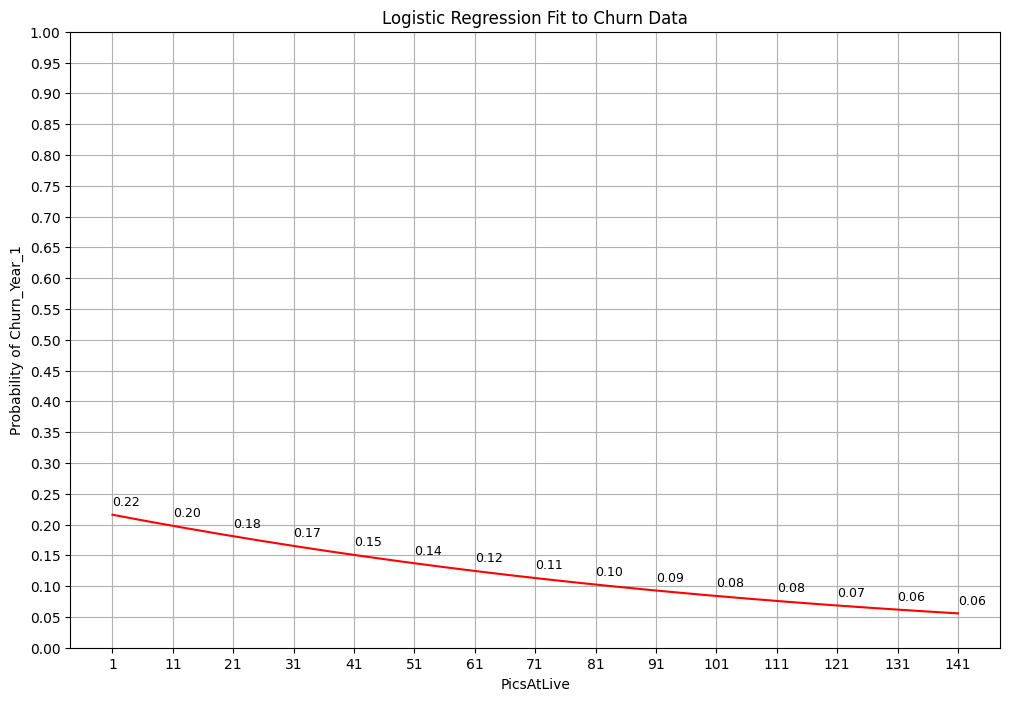

In [33]:
def log_reg_graph(df, independent, dependent):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LogisticRegression
    import numpy as np

    # Reshape data for sklearn
    X = df[independent].values.reshape(-1, 1)
    y = df[dependent].values

    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(X, y)  # Use X and y arrays here, not the column names

    # Generate predictions for a smooth curve
    X_test = np.arange(df[independent].min(), df[independent].max() + 1).reshape(-1, 1)
    y_pred = model.predict_proba(X_test)[:, 1]

    # Plotting the logistic regression result
    plt.figure(figsize=(12, 8))
    # sns.scatterplot(x=independent, y=dependent, data=df, s=100, alpha=0.6, marker='o')
    plt.plot(X_test.ravel(), y_pred, color='red')  # regression line
    plt.title('Logistic Regression Fit to Churn Data')
    plt.xlabel(independent)
    plt.ylabel('Probability of ' + dependent)
    plt.yticks(np.arange(0, 1 + 0.05, 0.05))  # Adjusts the range and interval of y-axis ticks
    plt.xticks(np.arange(0, df[independent].max() + 1, 10))  # Ticks every 10 units from 0 to max

    # Define ticks manually to include min and max explicitly
    min_tick = X_test.min()
    max_tick = X_test.max()
    tick_interval = 10
    ticks = np.arange(min_tick, max_tick + 1, tick_interval)  # ensures inclusion of max_tick
    plt.xticks(ticks)  # Set the ticks

    # Labeling probabilities at the manually set x-ticks
    for tick in ticks:  # Use the manually defined ticks
        idx = np.where(X_test.ravel() == tick)  # Find the index where X_test matches the tick
        if idx[0].size > 0:  # Ensure the index array is not empty
            probability = y_pred[idx[0][0]]  # Access the first element of the index array
            plt.text(tick, probability + 0.01, f'{probability:.2f}', fontsize=9, verticalalignment='bottom')

    plt.grid(True)
    plt.show()

    # Create DataFrame for exporting to Excel
    predictions_df = pd.DataFrame({
        independent: X_test.ravel(),  # Flatten the array to match y_pred's shape
        'ProbabilityOfChurn': y_pred
    })

log_reg_graph(PropertyWithImage, 'PicsAtLive', 'Churn_Year_1')


In [38]:
predictions_df

NameError: name 'predictions_df' is not defined

In [78]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is your DataFrame and has been defined earlier.
# plt.figure(figsize=(12, 20))
# sns.boxplot(x='Churn_Year_1', y='PicsAtLive', data=df)
# plt.title('Distribution of PicsAtLive by Churn Status')
# plt.xlabel('Pictures at Live')
# plt.ylabel('Churn Flag')
# plt.show()


In [77]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is your DataFrame and has been defined earlier.
# plt.figure(figsize=(4, 20))
# sns.boxplot(x='ChurnFlag', y='PicsAtLive', data=df, showfliers=False)  # Hides the outliers in the plot
# plt.title('Distribution of PicsAtLive by Churn Status')
# plt.xlabel('Churn Flag')
# plt.ylabel('Pics At Live')
# plt.show()


In [100]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter out the outliers
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_filtered

# # Apply the function to the 'PicsAtLive' column
# df_filtered = remove_outliers(df, 'PicsAtLive')

# # Plotting without the outliers in the data
# plt.figure(figsize=(12, 20))
# boxplot = sns.boxplot(x='ChurnFlag', y='PicsAtLive', data=df_filtered)
# plt.title('Distribution of PicsAtLive by Churn Status without Outliers')
# plt.xlabel('Churn Flag')
# plt.ylabel('Pics At Live')

# # Calculate the descriptive statistics
# stats = df_filtered.groupby(['ChurnFlag'])['PicsAtLive'].describe()

# # Annotating statistics like min, max, mean, 25%, 50%, and 75% quartiles
# for tick, label in zip(range(len(stats)), boxplot.get_xticks()):
#     boxplot.text(label, stats['max'][tick] + 0.05, 'max: {:.2f}'.format(stats['max'][tick]),
#                  horizontalalignment='center', size='x-small', color='black', weight='semibold')
#     boxplot.text(label, stats['min'][tick] - 0.05, 'min: {:.2f}'.format(stats['min'][tick]),
#                  horizontalalignment='center', size='x-small', color='black', weight='semibold', verticalalignment='top')
#     boxplot.text(label, stats['50%'][tick], 'med: {:.2f}'.format(stats['50%'][tick]),
#                  horizontalalignment='center', size='x-small', color='black', weight='semibold')
#     boxplot.text(label, stats['mean'][tick], 'mean: {:.2f}'.format(stats['mean'][tick]),
#                  horizontalalignment='center', size='x-small', color='red', weight='semibold')  # Highlight mean
#     boxplot.text(label, stats['25%'][tick], '25%: {:.2f}'.format(stats['25%'][tick]),
#                  horizontalalignment='center', size='x-small', color='blue', weight='semibold')  # Highlight 25%
#     boxplot.text(label, stats['75%'][tick], '75%: {:.2f}'.format(stats['75%'][tick]),
#                  horizontalalignment='center', size='x-small', color='green', weight='semibold')  # Highlight 75%

# plt.show()


In [31]:
predictions_df

NameError: name 'predictions_df' is not defined

#### Function to create probability Grpah and rate of change graph

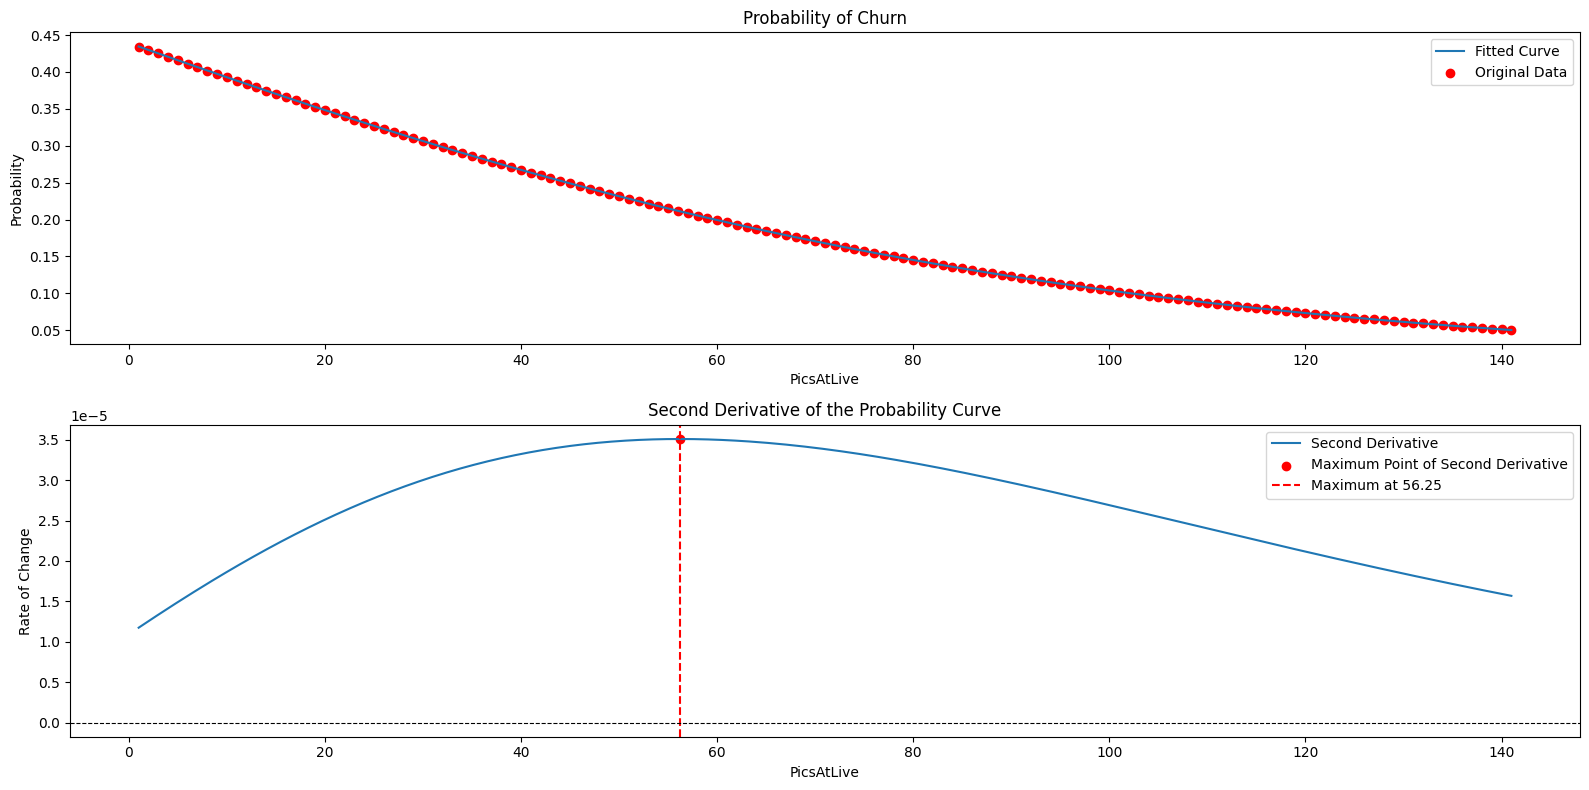

Optimized number of pictures (maximum curvature): 56.25


In [19]:


def change_graph(df, independent, dependent):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.interpolate import UnivariateSpline
    from sklearn.linear_model import LogisticRegression
    # Prepare data
    X = df[independent].values.reshape(-1, 1)
    y = df[dependent].values

    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(X, y)

    # Generate predictions for a smooth curve
    X_test = np.arange(X.min(), X.max() + 1).reshape(-1, 1)
    y_pred = model.predict_proba(X_test)[:, 1]

    # Fit a spline to smooth the probability curve
    spline = UnivariateSpline(X_test.ravel(), y_pred, k=4, s=0)
    second_deriv = spline.derivative(2)
    
    # Generate more points for a smoother curve
    x_range = np.linspace(X_test.min(), X_test.max(), 300)
    second_deriv_values = second_deriv(x_range)
    
    # Find the highest point of the second derivative
    max_idx = np.argmax(second_deriv_values)
    max_second_deriv = second_deriv_values[max_idx]
    optimized_point = x_range[max_idx]
    
    # Plotting
    plt.figure(figsize=(16, 8))
    plt.subplot(211)
    plt.plot(x_range, spline(x_range), label='Fitted Curve')
    plt.scatter(X_test.ravel(), y_pred, color='red', label='Original Data')
    plt.title('Probability of Churn')
    plt.xlabel(independent)
    plt.ylabel('Probability')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(x_range, second_deriv_values, label='Second Derivative')
    plt.scatter(optimized_point, max_second_deriv, color='red', label='Maximum Point of Second Derivative')
    plt.axvline(optimized_point, color='red', linestyle='--', label=f'Maximum at {optimized_point:.2f}')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Horizontal line at zero for reference
    plt.title('Second Derivative of the Probability Curve')
    plt.xlabel(independent)
    plt.ylabel('Rate of Change')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Output the optimized number of pictures
    print(f"Optimized number of pictures (maximum curvature): {optimized_point:.2f}")

# Example call
change_graph(PropertyWithImage, 'PicsAtLive', 'ChurnFlag')

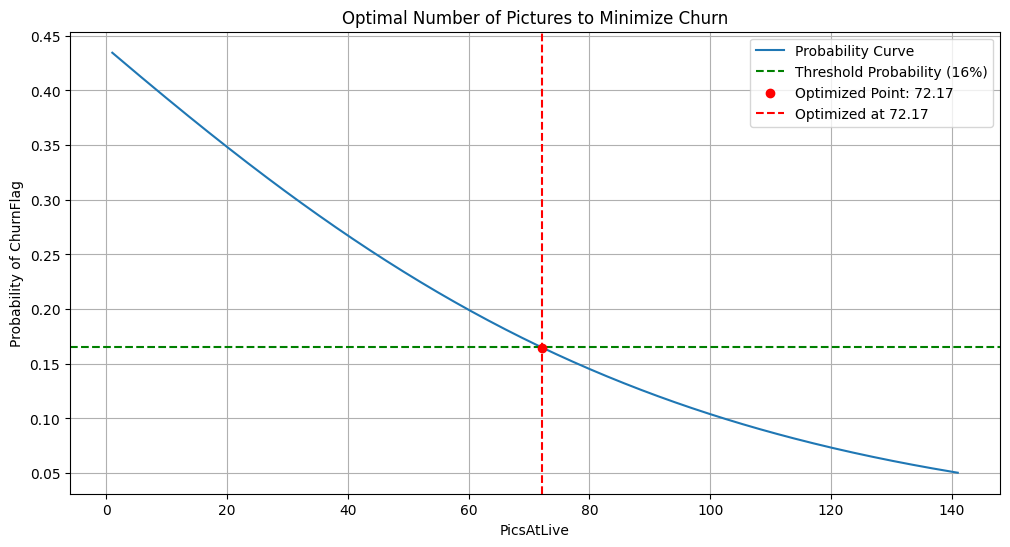

Optimized number of pictures: 72.17


In [20]:


def decided_level_optimisation(df, independent, dependent, threshold_probability):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import UnivariateSpline
    from sklearn.linear_model import LogisticRegression
    # Prepare data
    X = df[independent].values.reshape(-1, 1)
    y = df[dependent].values

    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(X, y)

    # Generate predictions for a smooth curve
    X_test = np.arange(X.min(), X.max() + 1).reshape(-1, 1)
    y_pred = model.predict_proba(X_test)[:, 1]

    # Fit a spline for smooth interpolation
    spline = UnivariateSpline(X_test.ravel(), y_pred, k=4, s=0)
    
    # Generate more points for a smoother curve
    x_range = np.linspace(X_test.min(), X_test.max(), 300)
    y_smooth = spline(x_range)
    
    # Find the first point where the probability drops below the threshold
    mask = y_smooth <= threshold_probability
    if any(mask):
        optimized_point = x_range[mask][0]  # The first point where the probability drops below threshold
    else:
        optimized_point = x_range[-1]  # No point drops below threshold, take the maximum
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(x_range, y_smooth, label='Probability Curve')
    plt.axhline(threshold_probability, color='green', linestyle='--', label=f'Threshold Probability ({threshold_probability*100:.0f}%)')
    plt.scatter(optimized_point, spline(optimized_point), color='red', zorder=5, label=f'Optimized Point: {optimized_point:.2f}')
    plt.axvline(optimized_point, color='red', linestyle='--', label=f'Optimized at {optimized_point:.2f}')
    plt.title('Optimal Number of Pictures to Minimize Churn')
    plt.xlabel(independent)
    plt.ylabel('Probability of ' + dependent)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Output the optimized number of pictures
    print(f"Optimized number of pictures: {optimized_point:.2f}")

# Example call
decided_level_optimisation(PropertyWithImage, 'PicsAtLive', 'ChurnFlag', 0.165)


In [21]:


def statistical_figures(df, independent, dependent):
    import statsmodels.api as sm
    # Prepare data
    X = df[independent].values.reshape(-1, 1)
    y = df[dependent].values

    # Add a constant to the features since statsmodels does not add it by default
    X_sm = sm.add_constant(X)
    
    # Fit the logistic regression model using statsmodels
    model_sm = sm.Logit(y, X_sm).fit()
    
    # Print the model summary to check p-values and other statistical measures
    print(model_sm.summary())

# Example call
statistical_figures(PropertyWithImage, 'PicsAtLive', 'ChurnFlag')

Optimization terminated successfully.
         Current function value: 0.624099
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14722
Model:                          Logit   Df Residuals:                    14720
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                0.007313
Time:                        11:04:50   Log-Likelihood:                -9188.0
converged:                       True   LL-Null:                       -9255.7
Covariance Type:            nonrobust   LLR p-value:                 2.738e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2444      0.047     -5.228      0.000      -0.336      -0.153
x1            -0.0191      0.

1. Current function value: 0.618661--Lower it is better it is
2. Iterations 5-to find the best coefficients for the logistic regression model terminated in 5 iteration, straight forward data patterns or a well specified model.
3. Pseudo R-Squ-0.007109 is very low which mean model only explain very small portion of the variance in dependent variable, this means we might need more variable or non linear model
4. Const:The coefficient for the intercept is -0.2859 with a standard error of 0.048. The z-value of -5.977 and a p-value close to zero (P>|z|) suggest that the intercept is significantly different from zero.
5. x1: The coefficient for x1 is -0.0189, with a standard error of 0.002. This coefficient is significantly different from zero (z-value of -10.888 and a p-value essentially 0). The negative coefficient indicates that as x1 increases, the log odds of the outcome variable y occurring decrease, meaning more pictures are associated with lower chances of churn.




1) The p-values for both the intercept and the predictor variable are very low (0.000), 
indicating that they are statistically significant. This means that the number of images is 
a significant predictor of the probability of losing a property.
2) The negative coefficient for x1 (-0.0189) suggests that as the number of images increases, 
the probability of losing a property decreases. This aligns with your observation that more images are associated with lower churn.
3)  Despite the low pseudo R-squared value (0.007109), the significant coefficient indicates that the number of images is an important
factor in predicting property churn. 
The low pseudo R-squared suggests that there are other factors influencing churn that are not captured by this model.

#### 1 Bedroom

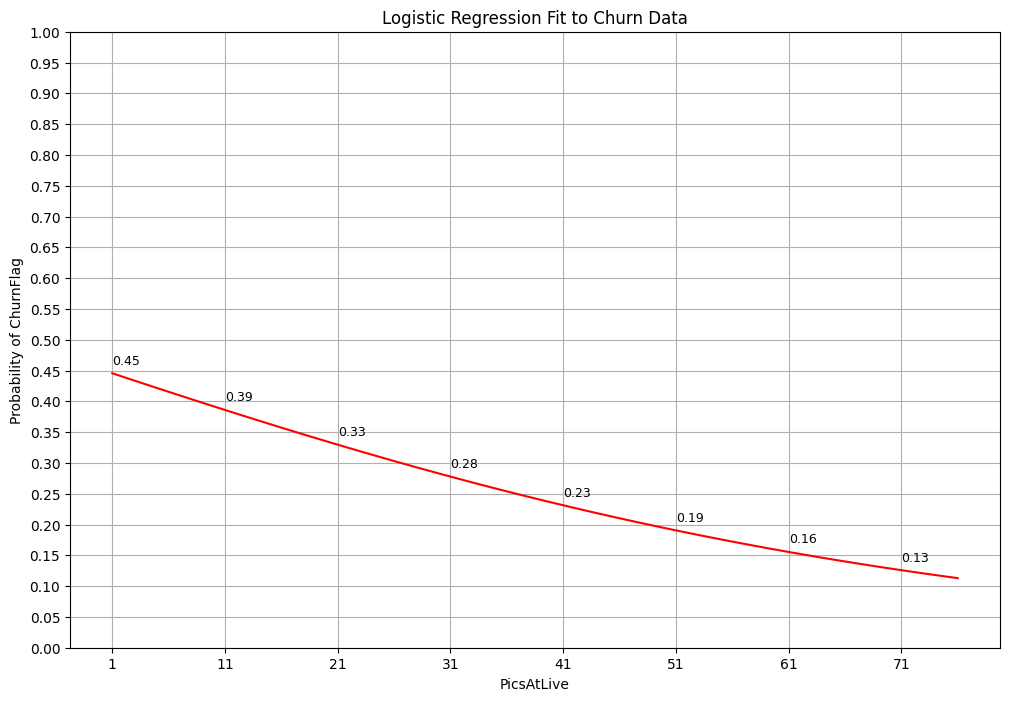

In [35]:
# Filtering data
PropertyBedroom1 = PropertyWithImage[PropertyWithImage['Bedrooms'] == 1]


log_reg_graph(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')
# change_graph(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')

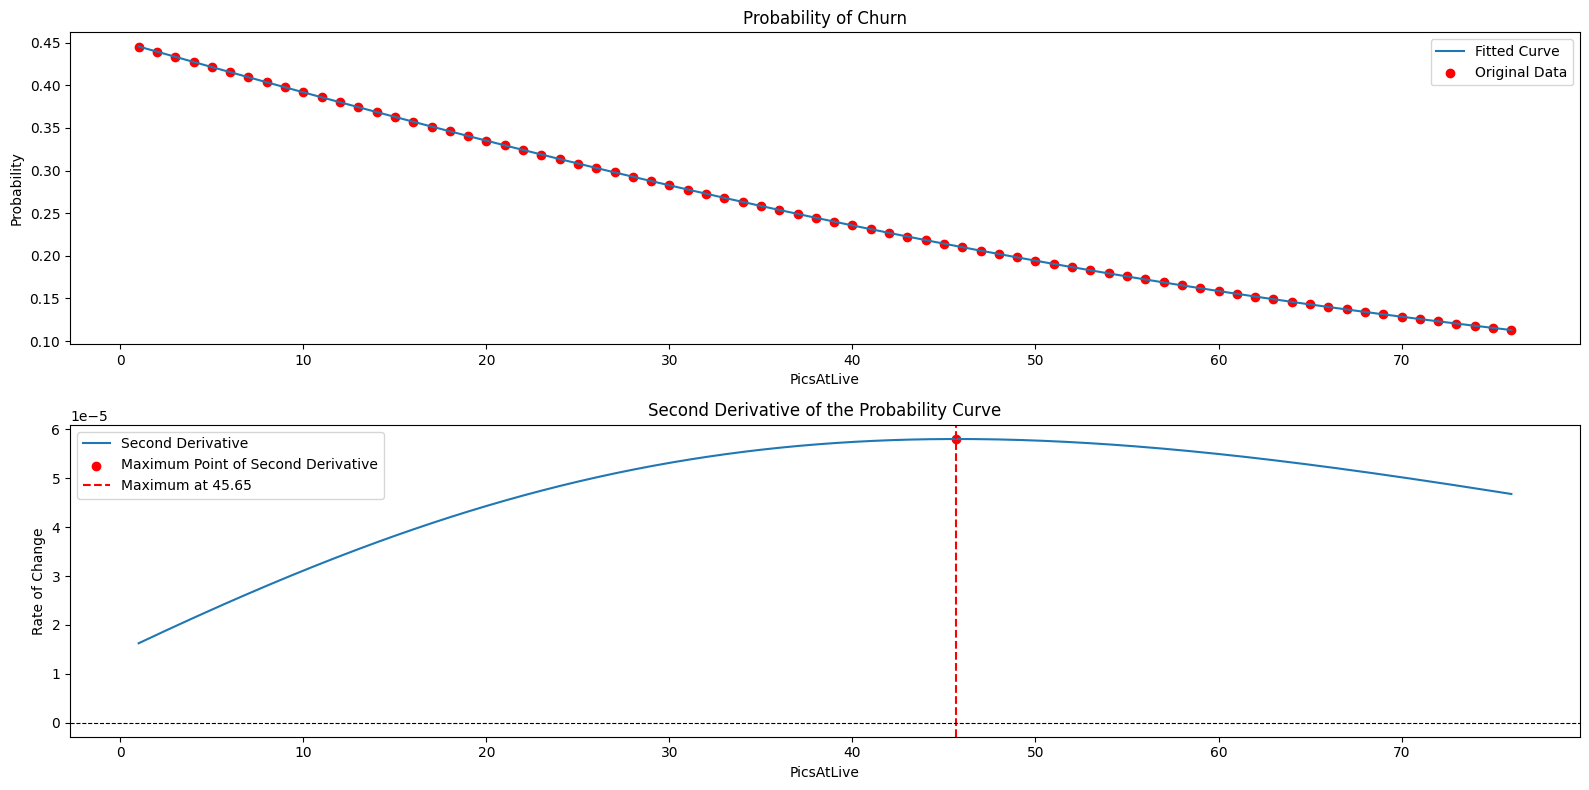

Optimized number of pictures (maximum curvature): 45.65


In [36]:
# log_reg_graph(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')
change_graph(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')

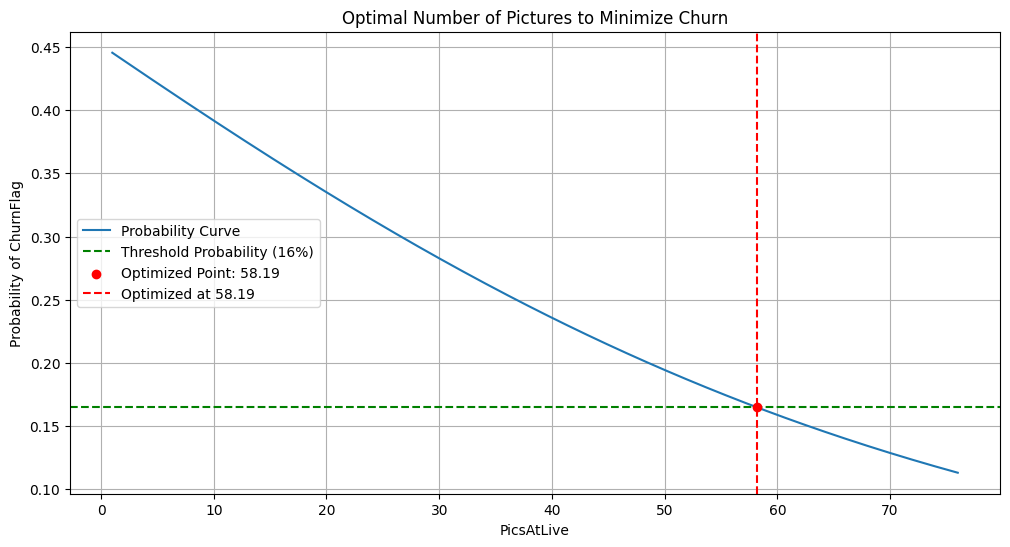

Optimized number of pictures: 58.19


In [37]:
decided_level_optimisation(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag', 0.165)

In [38]:
# log_reg_graph(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')
# change_graph(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag', 0.20)
statistical_figures(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')

Optimization terminated successfully.
         Current function value: 0.634785
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2834
Model:                          Logit   Df Residuals:                     2832
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                0.005120
Time:                        15:07:33   Log-Likelihood:                -1799.0
converged:                       True   LL-Null:                       -1808.2
Covariance Type:            nonrobust   LLR p-value:                 1.685e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1942      0.121     -1.605      0.109      -0.431       0.043
x1            -0.0246      0.

#### Bedroom 2

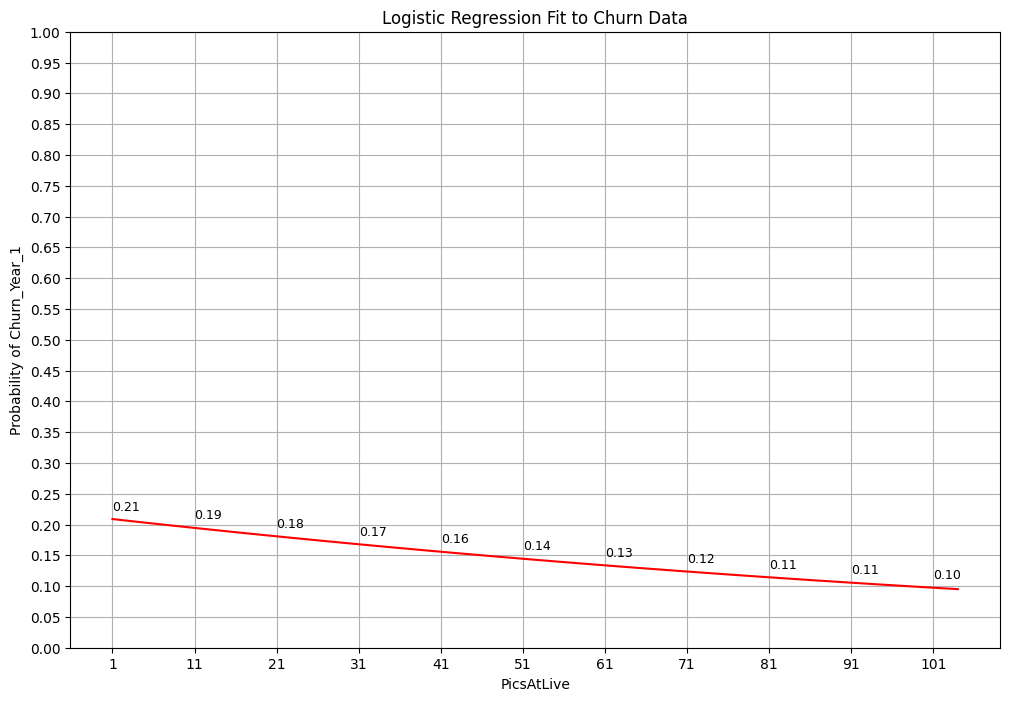

In [22]:
# Filtering data
PropertyBedroom2 = PropertyWithImage[PropertyWithImage['Bedrooms'] == 2]


log_reg_graph(PropertyBedroom2, 'PicsAtLive', 'Churn_Year_1')
# change_graph(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')

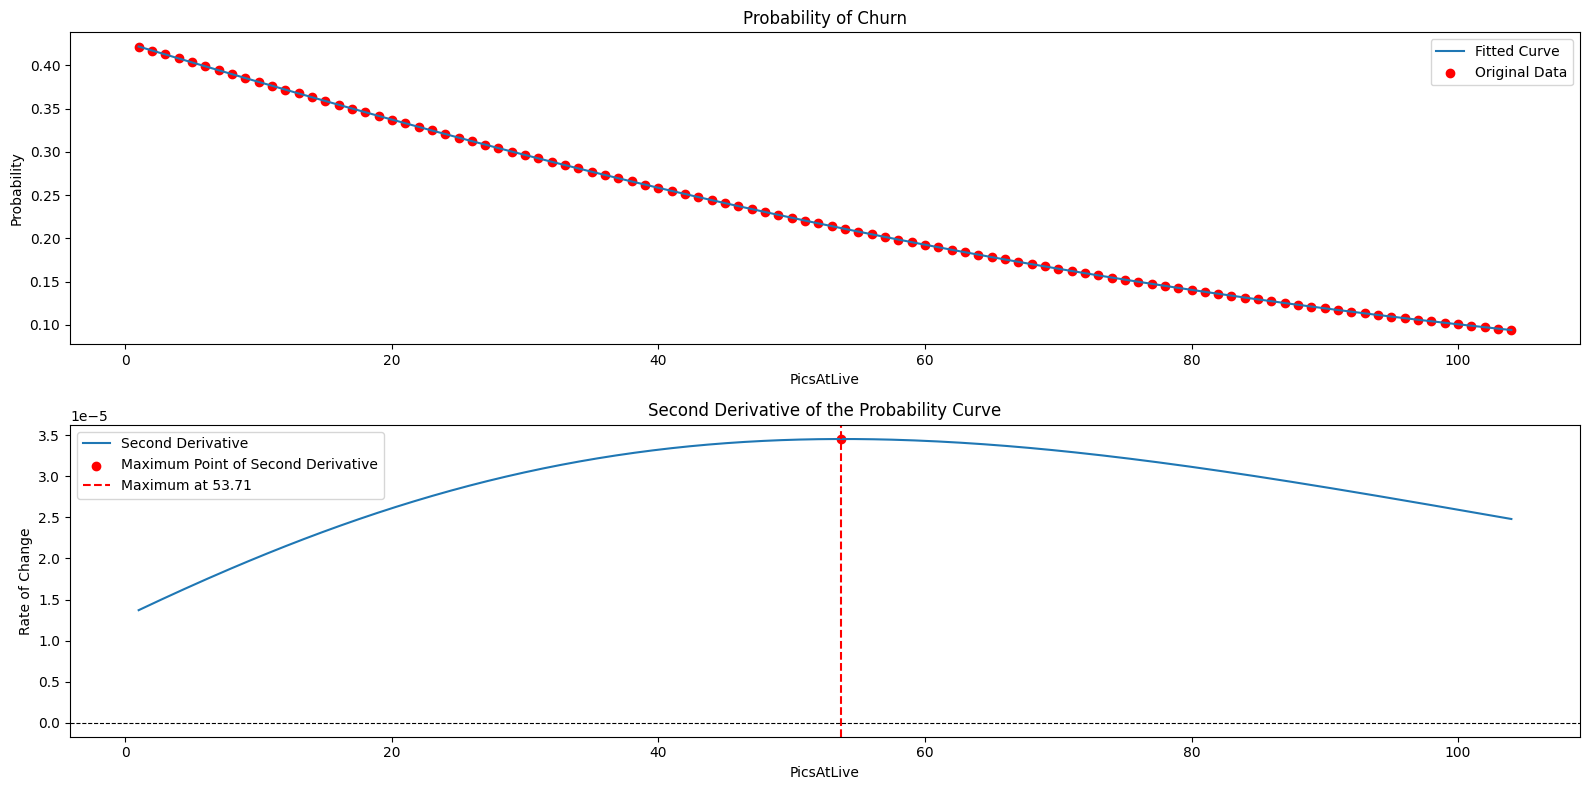

Optimized number of pictures (maximum curvature): 53.71


In [40]:
# log_reg_graph(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')
change_graph(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')

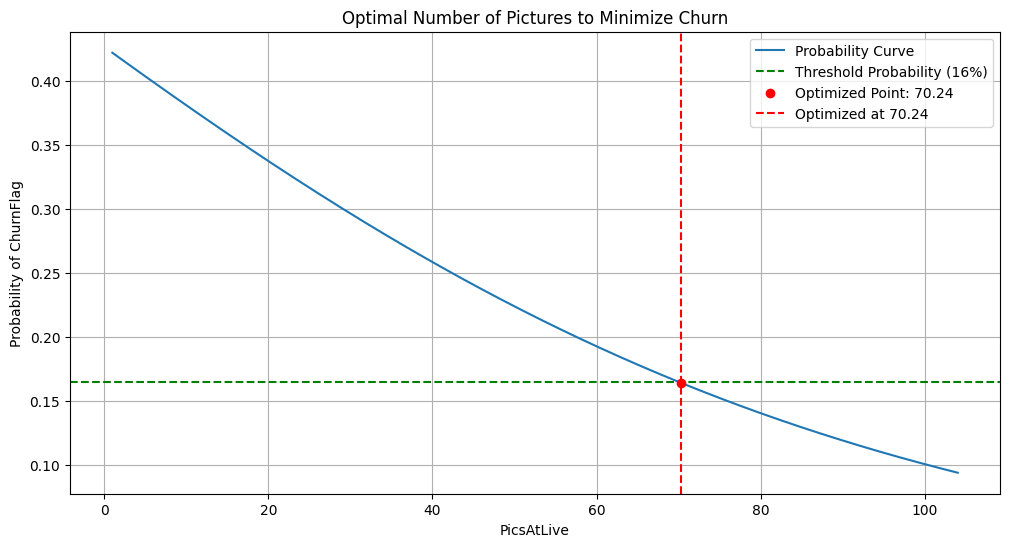

Optimized number of pictures: 70.24


In [41]:
decided_level_optimisation(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag', 0.165)

In [42]:
# log_reg_graph(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')
# change_graph(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag', 0.20)
statistical_figures(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')

Optimization terminated successfully.
         Current function value: 0.625431
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5420
Model:                          Logit   Df Residuals:                     5418
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                0.004185
Time:                        15:08:34   Log-Likelihood:                -3389.8
converged:                       True   LL-Null:                       -3404.1
Covariance Type:            nonrobust   LLR p-value:                 9.420e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2964      0.089     -3.312      0.001      -0.472      -0.121
x1            -0.0190      0.

#### Bedroom-3

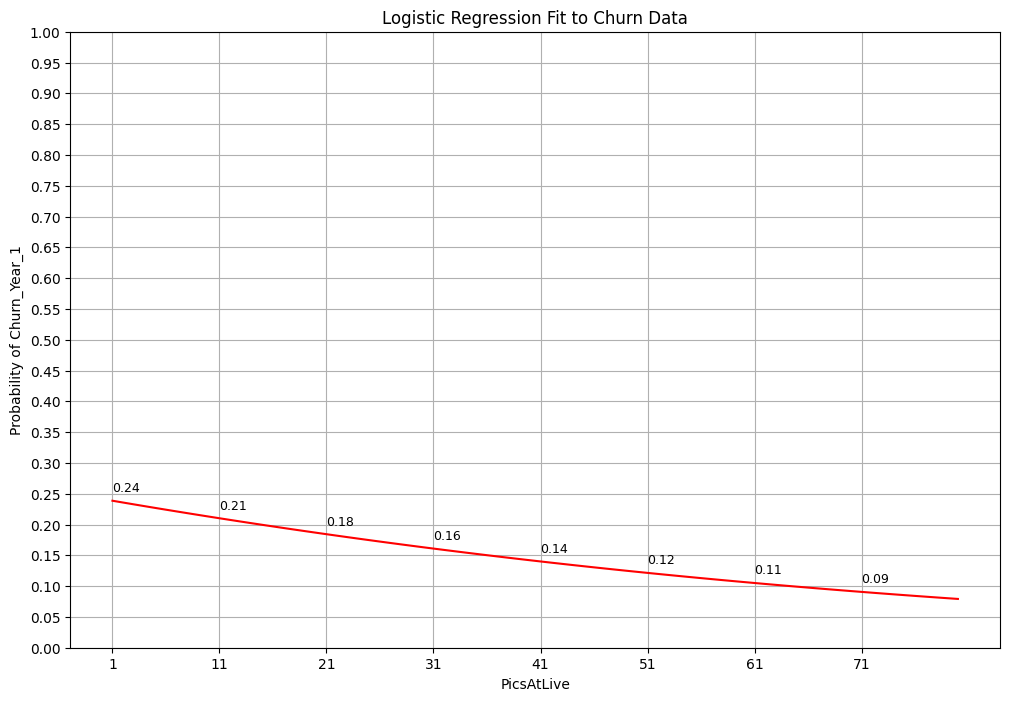

In [23]:
# Filtering data
PropertyBedroom3 = PropertyWithImage[PropertyWithImage['Bedrooms'] == 3]


log_reg_graph(PropertyBedroom3, 'PicsAtLive', 'Churn_Year_1')
# change_graph(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag')

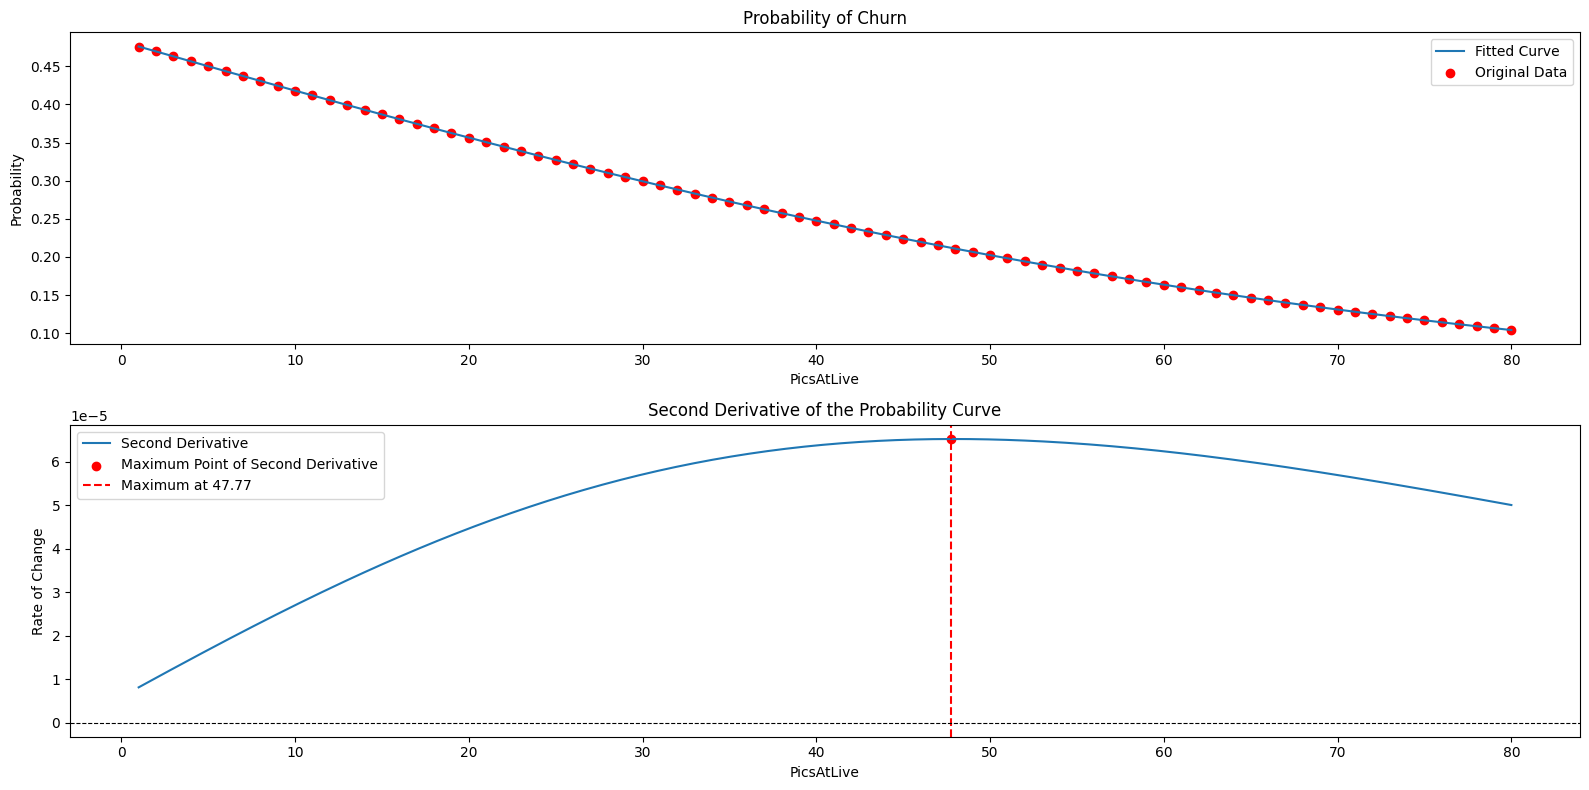

Optimized number of pictures (maximum curvature): 47.77


In [44]:
# Filtering data
# PropertyBedroom3 = PropertyWithImage[PropertyWithImage['Bedrooms'] == 3]


# log_reg_graph(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag')
change_graph(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag')

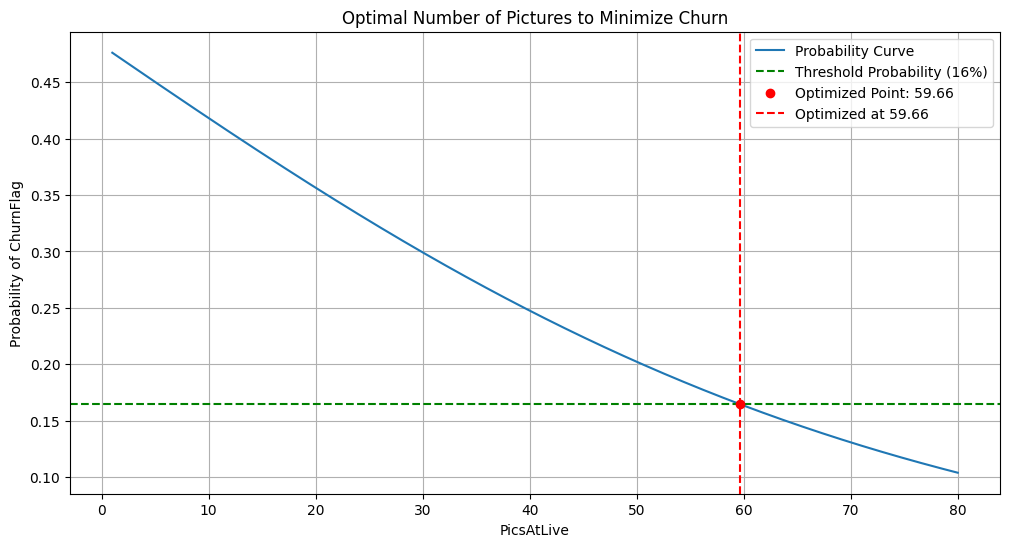

Optimized number of pictures: 59.66


In [45]:
decided_level_optimisation(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag', 0.165)

In [24]:
 ## Filtering data
# PropertyBedroom3 = PropertyWithImage[PropertyWithImage['Bedrooms'] == 3]


# log_reg_graph(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag')
# change_graph(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag', 0.20)
statistical_figures(PropertyBedroom3, 'PicsAtLive', 'Churn_Year_1')

Optimization terminated successfully.
         Current function value: 0.451529
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3909
Model:                          Logit   Df Residuals:                     3907
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                0.003747
Time:                        11:06:54   Log-Likelihood:                -1765.0
converged:                       True   LL-Null:                       -1771.7
Covariance Type:            nonrobust   LLR p-value:                 0.0002685
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1438      0.131     -8.714      0.000      -1.401      -0.887
x1            -0.0164      0.

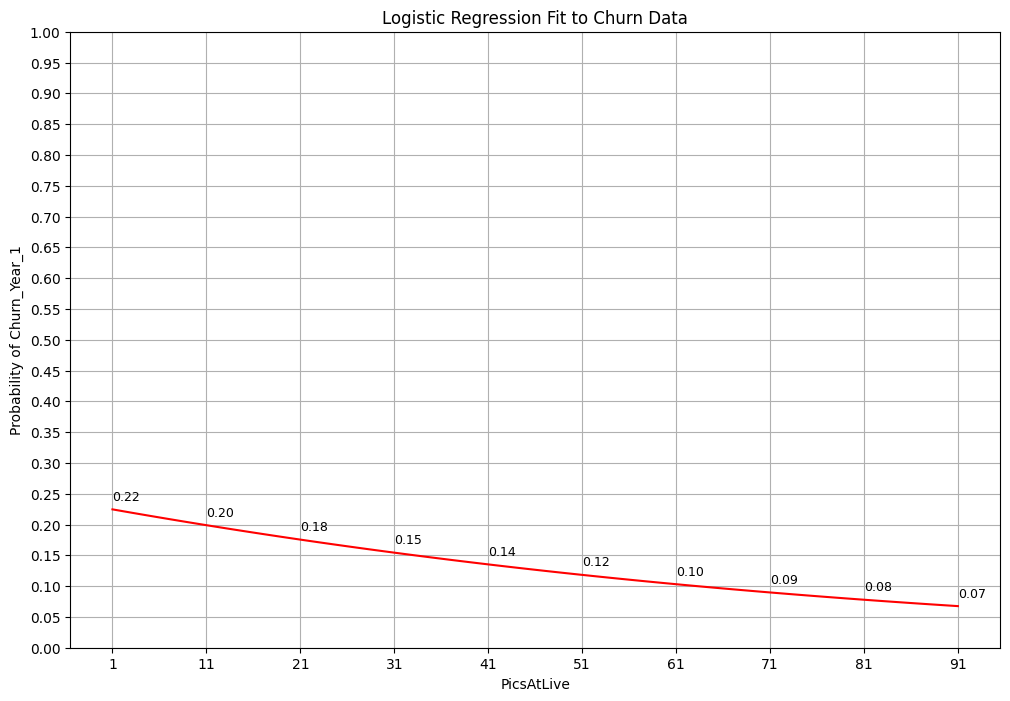

In [25]:
 ## Filtering data
PropertyBedroom4 = PropertyWithImage[PropertyWithImage['Bedrooms'] == 4]


log_reg_graph(PropertyBedroom4, 'PicsAtLive', 'Churn_Year_1')
# change_graph(PropertyBedroom4, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroom4, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroom4, 'PicsAtLive', 'ChurnFlag')

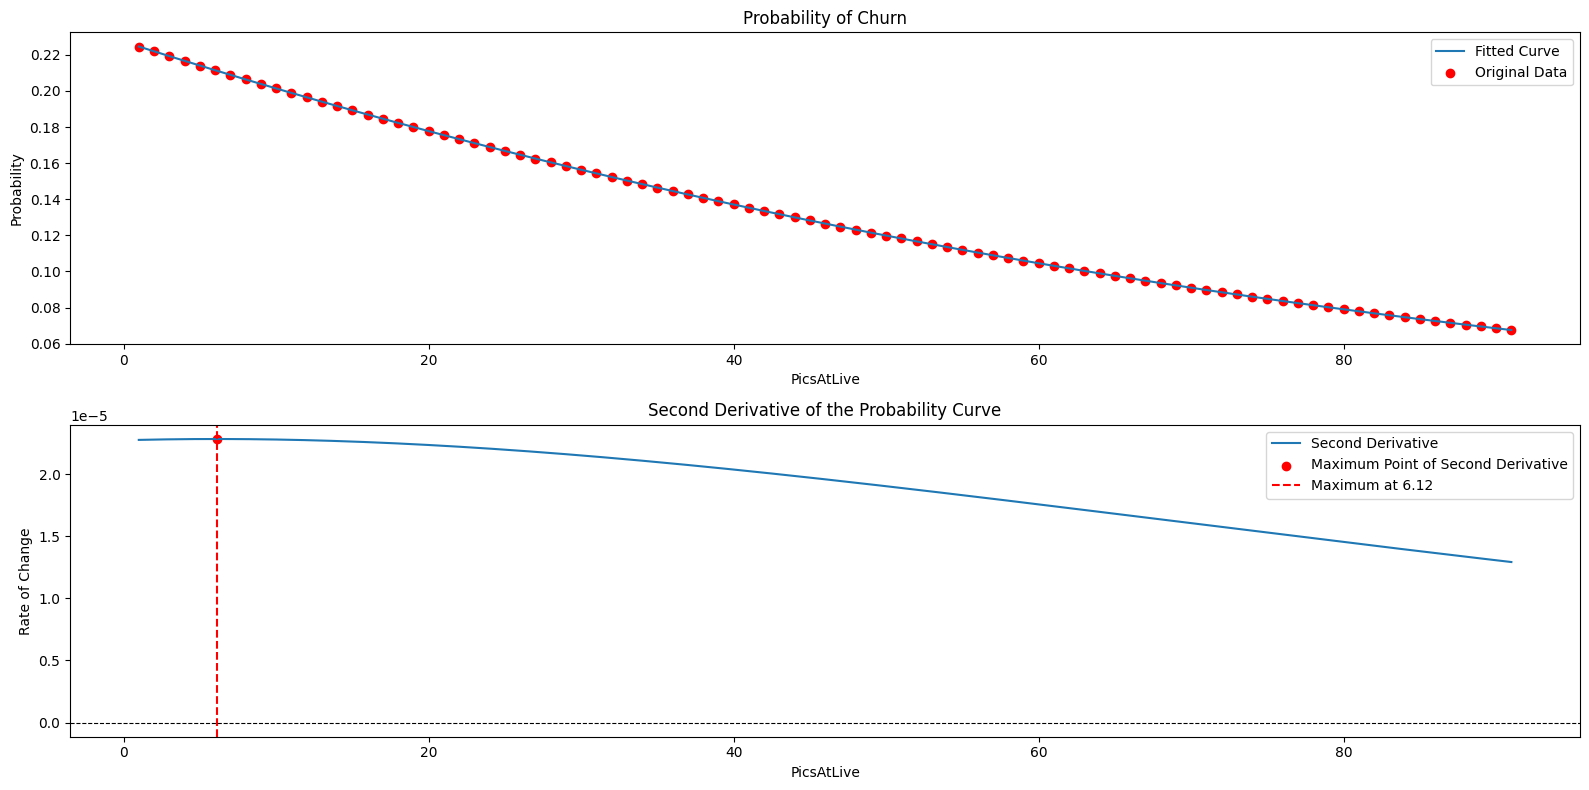

Optimized number of pictures (maximum curvature): 6.12


In [26]:
 ## Filtering data
# PropertyBedroom3 = PropertyWithImage[PropertyWithImage['Bedrooms'] == 4]


# log_reg_graph(PropertyBedroom4, 'PicsAtLive', 'ChurnFlag')
change_graph(PropertyBedroom4, 'PicsAtLive', 'Churn_Year_1')
# decided_level_optimisation(PropertyBedroom4, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroom4, 'PicsAtLive', 'ChurnFlag')

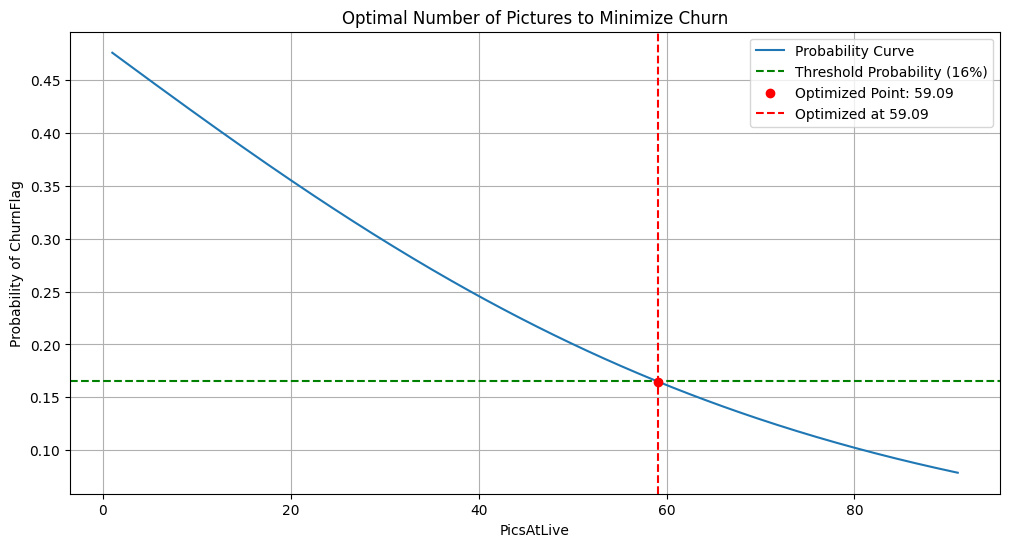

Optimized number of pictures: 59.09


In [49]:
decided_level_optimisation(PropertyBedroom4, 'PicsAtLive', 'ChurnFlag', 0.165)

In [27]:
statistical_figures(PropertyBedroom4, 'PicsAtLive', 'Churn_Year_1')

Optimization terminated successfully.
         Current function value: 0.420298
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1456
Model:                          Logit   Df Residuals:                     1454
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                0.004581
Time:                        11:07:22   Log-Likelihood:                -611.95
converged:                       True   LL-Null:                       -614.77
Covariance Type:            nonrobust   LLR p-value:                   0.01763
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2236      0.227     -5.400      0.000      -1.668      -0.780
x1            -0.0154      0.

#### bedroom 5 & more

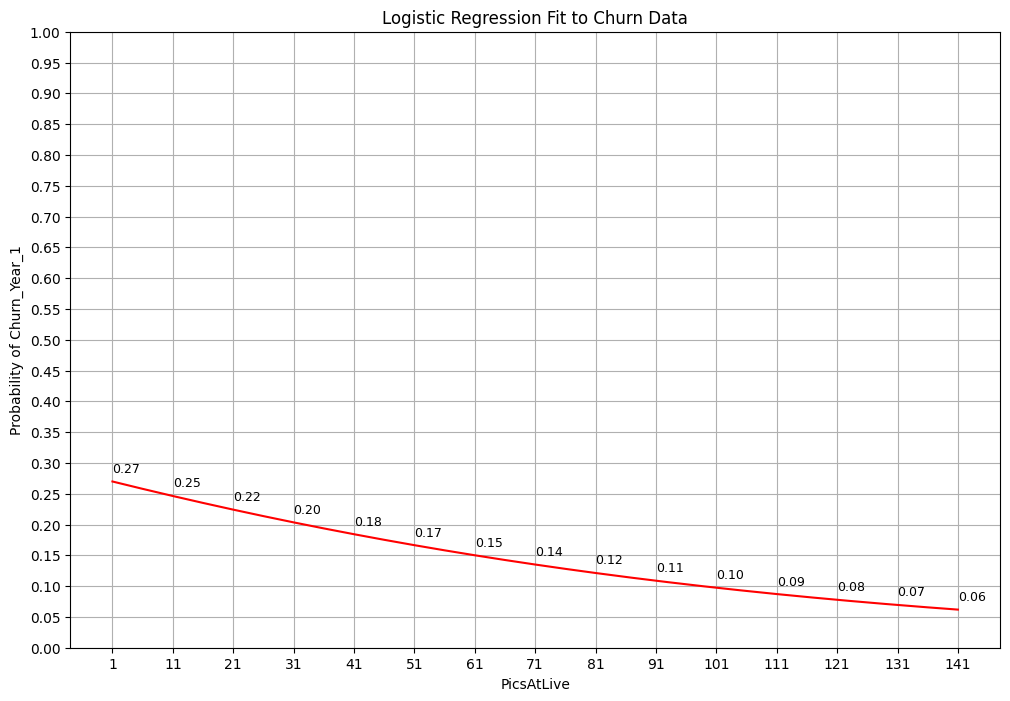

In [28]:
 ## Filtering data
PropertyBedroommorethan5 = PropertyWithImage[PropertyWithImage['Bedrooms'] > 4]


log_reg_graph(PropertyBedroommorethan5, 'PicsAtLive', 'Churn_Year_1')
# change_graph(PropertyBedroommorethan4, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroommorethan4, 'PicsAtLive', 'ChurnFlag', 0.20)
# statistical_figures(PropertyBedroommorethan4, 'PicsAtLive', 'ChurnFlag')

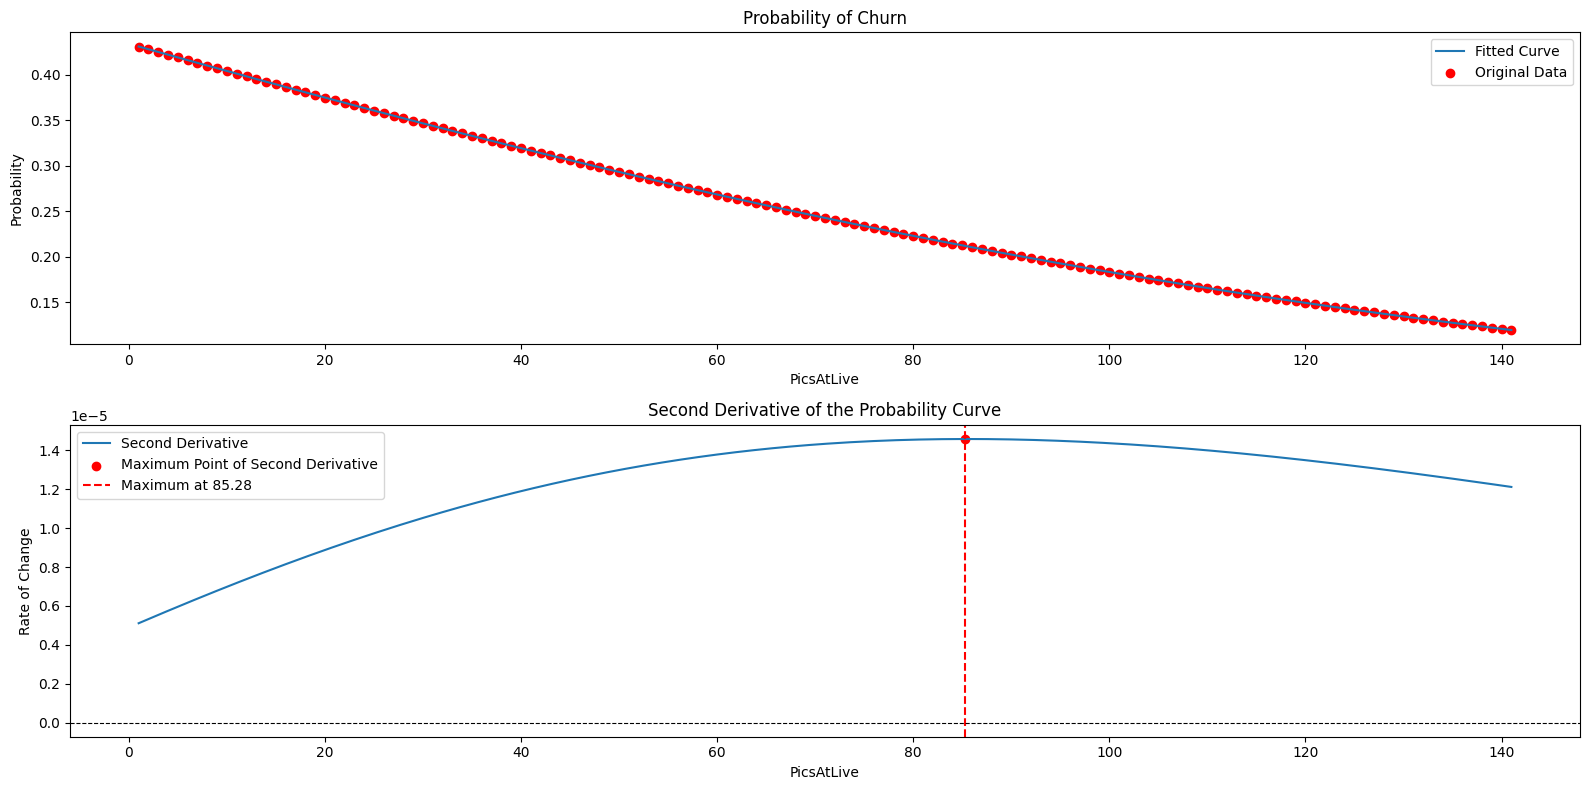

Optimized number of pictures (maximum curvature): 85.28


In [52]:
change_graph(PropertyBedroommorethan5, 'PicsAtLive', 'ChurnFlag')

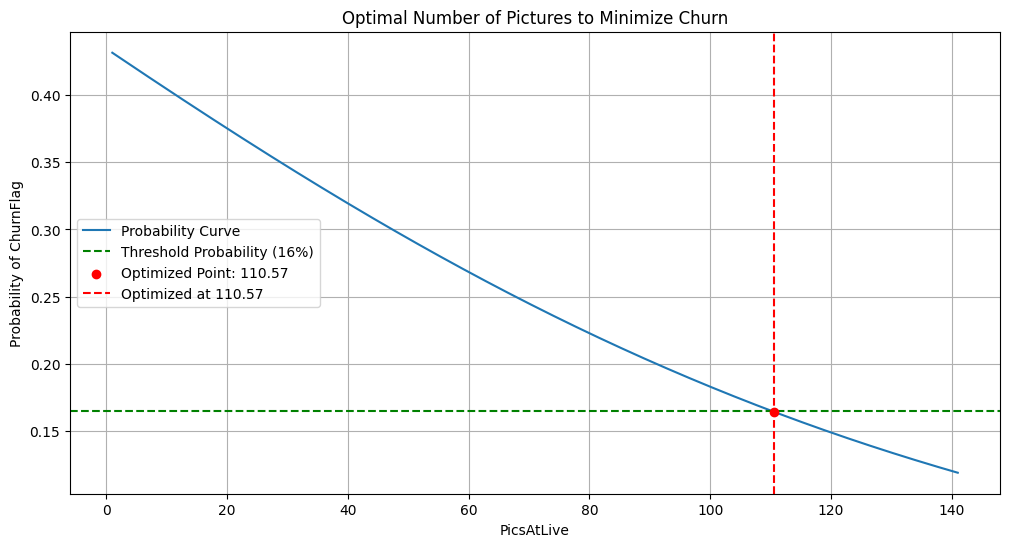

Optimized number of pictures: 110.57


In [53]:
decided_level_optimisation(PropertyBedroommorethan5, 'PicsAtLive', 'ChurnFlag', 0.165)

In [29]:
# log_reg_graph(PropertyBedroommorethan4, 'PicsAtLive', 'ChurnFlag')
# change_graph(PropertyBedroommorethan4, 'PicsAtLive', 'ChurnFlag')
# decided_level_optimisation(PropertyBedroommorethan4, 'PicsAtLive', 'ChurnFlag', 0.20)
statistical_figures(PropertyBedroommorethan5, 'PicsAtLive', 'Churn_Year_1')

Optimization terminated successfully.
         Current function value: 0.473658
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  926
Model:                          Logit   Df Residuals:                      924
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                0.006562
Time:                        11:07:54   Log-Likelihood:                -438.61
converged:                       True   LL-Null:                       -441.50
Covariance Type:            nonrobust   LLR p-value:                   0.01608
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9830      0.227     -4.321      0.000      -1.429      -0.537
x1            -0.0123      0.

In [66]:
statistical_figures(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag')

Optimization terminated successfully.
         Current function value: 0.634785
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2834
Model:                          Logit   Df Residuals:                     2832
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                0.005120
Time:                        15:24:08   Log-Likelihood:                -1799.0
converged:                       True   LL-Null:                       -1808.2
Covariance Type:            nonrobust   LLR p-value:                 1.685e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1942      0.121     -1.605      0.109      -0.431       0.043
x1            -0.0246      0.

In [67]:
print("for bedroom-1",statistical_figures(PropertyBedroom1, 'PicsAtLive', 'ChurnFlag'))
print("for bedroom-2",statistical_figures(PropertyBedroom2, 'PicsAtLive', 'ChurnFlag'))
print("for bedroom-3",statistical_figures(PropertyBedroom3, 'PicsAtLive', 'ChurnFlag'))
print("for bedroom-4",statistical_figures(PropertyBedroom4, 'PicsAtLive', 'ChurnFlag'))
print("for bedroom>4",statistical_figures(PropertyBedroommorethan5, 'PicsAtLive', 'ChurnFlag'))

Optimization terminated successfully.
         Current function value: 0.634785
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2834
Model:                          Logit   Df Residuals:                     2832
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                0.005120
Time:                        15:24:16   Log-Likelihood:                -1799.0
converged:                       True   LL-Null:                       -1808.2
Covariance Type:            nonrobust   LLR p-value:                 1.685e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1942      0.121     -1.605      0.109      -0.431       0.043
x1            -0.0246      0.

### ALL

In [64]:
print("for bedroom-1",statistical_figures(PropertyBedroom1, 'PicsAtLive', 'Churn_Year_1'))
print("for bedroom-2",statistical_figures(PropertyBedroom2, 'PicsAtLive', 'Churn_Year_1'))
print("for bedroom-3",statistical_figures(PropertyBedroom3, 'PicsAtLive', 'Churn_Year_1'))
print("for bedroom-4",statistical_figures(PropertyBedroom4, 'PicsAtLive', 'Churn_Year_1'))
print("for bedroom>4",statistical_figures(PropertyBedroommorethan5, 'PicsAtLive', 'Churn_Year_1'))

Optimization terminated successfully.
         Current function value: 0.464131
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2834
Model:                          Logit   Df Residuals:                     2832
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                0.001538
Time:                        15:22:28   Log-Likelihood:                -1315.3
converged:                       True   LL-Null:                       -1317.4
Covariance Type:            nonrobust   LLR p-value:                   0.04410
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2631      0.149     -8.489      0.000      -1.555      -0.971
x1            -0.0142      0.

In [65]:
print("for bedroom-1",statistical_figures(PropertyBedroom1, 'PicsAtLive', 'Churn_Year_2'))
print("for bedroom-2",statistical_figures(PropertyBedroom2, 'PicsAtLive', 'Churn_Year_2'))
print("for bedroom-3",statistical_figures(PropertyBedroom3, 'PicsAtLive', 'Churn_Year_2'))
print("for bedroom-4",statistical_figures(PropertyBedroom4, 'PicsAtLive', 'Churn_Year_2'))
print("for bedroom>4",statistical_figures(PropertyBedroommorethan5, 'PicsAtLive', 'Churn_Year_2'))

Optimization terminated successfully.
         Current function value: 0.356002
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2834
Model:                          Logit   Df Residuals:                     2832
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                0.002539
Time:                        15:23:05   Log-Likelihood:                -1008.9
converged:                       True   LL-Null:                       -1011.5
Covariance Type:            nonrobust   LLR p-value:                   0.02344
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6589      0.178     -9.309      0.000      -2.008      -1.310
x1            -0.0193      0.